In [8]:
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np

### Grâce à des boxplots, on peut idenfifier là où peut se situer une particularité dans la distribution des abstentions

In [2]:
bureaux = pd.read_csv("../data/raw/PR17_BVot_T1_FE (copy).txt", encoding = "ISO-8859-1", sep =';', decimal =',')

bureaux

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Code du département           Libellé du département  \
0                       1                              Ain   
1                       1                              Ain   
2                       1                              Ain   
3                       1                              Ain   
4                       1                              Ain   
...                   ...                              ...   
69237                  ZZ  Français établis hors de France   
69238                  ZZ  Français établis hors de France   
69239                  ZZ  Français établis hors de France   
69240                  ZZ  Français établis hors de France   
69241                  ZZ  Français établis hors de France   

       Code de la circonscription Libellé de la circonscription  \
0                               4          4ème circonscription   
1                               5          5ème circonscription   
2                               5          5ème circonscription   
3                               5          5ème circonscription   
4                               5          5ème circonscription   
...                           ...                           ...   
69237                          11         11ème circonscription   
69238                          10         10ème circonscription   
69239                           7          7ème circonscription   
69240                           6          6ème circonscription   
69241                          11         11ème circonscription   

       Code de la commune    Libellé de la commune Code du b.vote  Inscrits  \
0                       1  L'Abergement-Clémenciat           0001       598   
1                       2    L'Abergement-de-Varey           0001       209   
2                       4        Ambérieu-en-Bugey           0001      1116   
3                       4        Ambérieu-en-Bugey           0002      1128   
4                       4        Ambérieu-en-Bugey           0003      1116   
...                   ...                      ...            ...       ...   
69237                 226                    Wuhan              1       369   
69238                 227                  Yaounde              1      1514   
69239                 228                   Zagreb              1       655   
69240                 229                   Zurich              1     21477   
69241                 231                   Taipeh              1      1204   

       Abstentions  % Abs/Ins  ...  Voix.9  % Voix/Ins.9  % Voix/Exp.9  \
0               92      15.38  ...       6          1.00          1.21   
1               25      11.96  ...       1          0.48          0.57   
2              233      20.88  ...       7          0.63          0.81   
3              256      22.70  ...      11          0.98          1.29   
4              227      20.34  ...       7          0.63          0.80   
...            ...        ...  ...     ...           ...           ...   
69237          129      34.96  ...       3          0.81          1.27   
69238          800      52.84  ...       4          0.26          0.56   
69239          401      61.22  ...       6          0.92          2.39   
69240        11129      51.82  ...      87          0.41          0.85   
69241          519      43.11  ...      35          2.91          5.18   

       N°Panneau.10  Sexe.10  Nom.10  Prénom.10  Voix.10  % Voix/Ins.10  \
0                11        M  FILLON   François      110          18.39   
1                11        M  FILLON   François       34          16.27   
2                11        M  FILLON   François      116          10.39   
3                11        M  FILLON   François      124          10.99   
4                11        M  FILLON   François      149          13.35   
...             ...      ...     ...        ...      ...            ...   
69237            11        M  FILLON   François       62          16.80   
69238            1

Text(0.5, 1.0, 'France et Outre Mer')

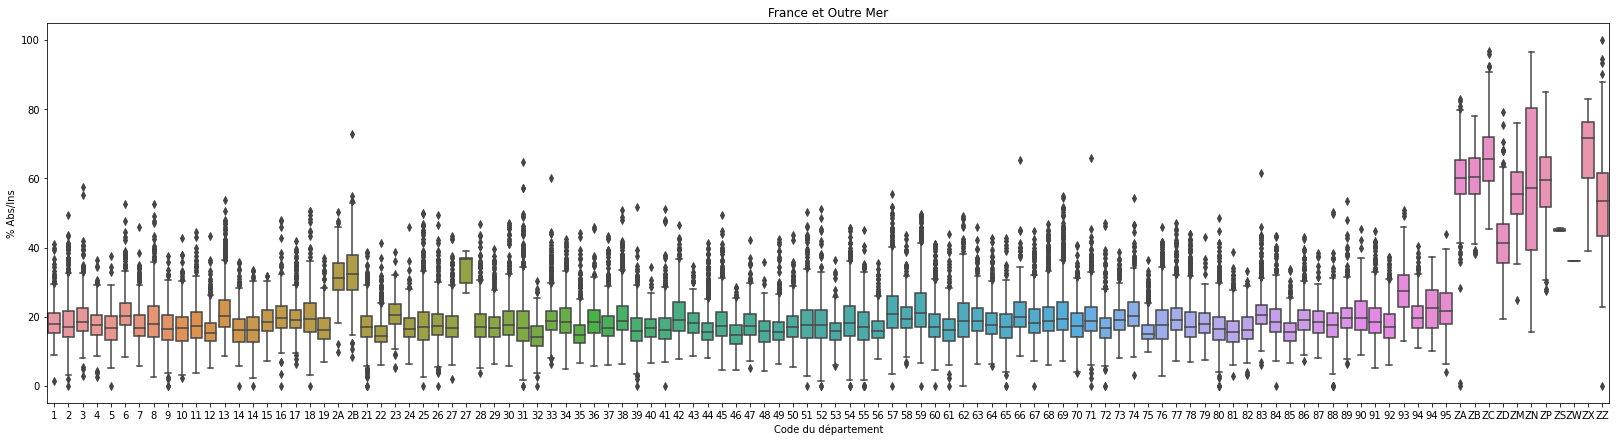

In [27]:
plt.figure(figsize=(28, 7))
sns.boxplot(
    
    x="Code du département",
    y="% Abs/Ins",
    data=bureaux
).set_title('France et Outre Mer')


array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, '14', '15', '16',
       '17', '18', '19', '2A', '2B', '21', '22', '23', '24', '25', '26',
       '27', 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, '94', '95', 'ZA', 'ZB', 'ZC', 'ZD', 'ZM', 'ZN', 'ZP', 'ZS',
       'ZW', 'ZX', 'ZZ'], dtype=object)

In [12]:
# Nous souhaitons identifier les département à distribution élevée d'abstentions
highabs = np.isin(bureaux['Code du département'] , ['ZA', 'ZB', 'ZC', 'ZD', 'ZM', 'ZN', 'ZP', 'ZS', 'ZW', 'ZX', 'ZZ'])
bureaux[highabs]['Libellé du département'].unique()

array(['Guadeloupe', 'Martinique', 'Guyane', 'La Réunion', 'Mayotte',
       'Nouvelle-Calédonie', 'Polynésie française',
       'Saint-Pierre-et-Miquelon', 'Wallis et Futuna',
       'Saint-Martin/Saint-Barthélemy', 'Français établis hors de France'],
      dtype=object)

##### Sur le graphique ci-dessus nous observons une distribution à valeurs élevées pour certains départements, qui sont hors-métropole
#### Il nous est possible de regarder de plus près ce qu'il se passe sur le territoire métropolitain

In [15]:
bureaux_metro = bureaux[np.isin(bureaux['Code du département'] , ['ZA', 'ZB', 'ZC', 'ZD', 'ZM', 'ZN', 'ZP', 'ZS', 'ZW', 'ZX', 'ZZ'], invert = True)]
bureaux_metro

Code du département Libellé du département  Code de la circonscription  \
0                       1                    Ain                           4   
1                       1                    Ain                           5   
2                       1                    Ain                           5   
3                       1                    Ain                           5   
4                       1                    Ain                           5   
...                   ...                    ...                         ...   
66539                  95             Val-d'Oise                           8   
66540                  95             Val-d'Oise                           8   
66541                  95             Val-d'Oise                           8   
66542                  95             Val-d'Oise                           9   
66543                  95             Val-d'Oise                           1   

      Libellé de la circonscription  Code de la commune  \
0              4ème circonscription                   1   
1              5ème circonscription                   2   
2              5ème circonscription                   4   
3              5ème circonscription                   4   
4              5ème circonscription                   4   
...                             ...                 ...   
66539          8ème circonscription                 680   
66540          8ème circonscription                 680   
66541          8ème circonscription                 680   
66542          9ème circonscription                 682   
66543          1ère circonscription                 690   

         Libellé de la commune Code du b.vote  Inscrits  Abstentions  \
0      L'Abergement-Clémenciat           0001       598           92   
1        L'Abergement-de-Varey           0001       209           25   
2            Ambérieu-en-Bugey           0001      1116          233   
3            Ambérieu-en-Bugey           0002      1128          256   
4            Ambérieu-en-Bugey           0003      1116          227   
...                        ...            ...       ...          ...   
66539          Villiers-le-Bel             11      1199          345   
66540          Villiers-le-Bel             12       981          317   
66541          Villiers-le-Bel             13       713          275   
66542          Villiers-le-Sec              1       120           10   
66543      Wy-dit-Joli-Village              1       309           46   

       % Abs/Ins  ...  Voix.9  % Voix/Ins.9  % Voix/Exp.9  N°Panneau.10  \
0          15.38  ...       6          1.00          1.21            11   
1          11.96  ...       1          0.48          0.57            11   
2          20.88  ...       7          0.63          0.81            11   
3          22.70  ...      11          0.98          1.29            11   
4          20.34  ...       7          0.63          0.80            11   
...          ...  ...     ...           ...           ...           ...   
66539      28.77  ...      18          1.50          2.16            11   
66540      32.31  ...       7          0.71          1.09            11   
66541      38.57  ...       4          0.56          0.97            11   
66542       8.33  ...       2          1.67          1.89            11   
66543      14.89  ...       4          1.29          1.53            11   

       Sexe.10  Nom.10  Prénom.10  Voix.10  % Voix/Ins.10  % Voix/Exp.10  
0            M  FILLON   François      110          18.39          22.22  
1            M  FILLON   François       34          16.27          19.32  
2            M  FILLON   François      116          10.39          13.49  
3            M  FILLON   François      124          10.99          14.59  
4            M  FILLON   François      149          13.35          17.05  
...        ...     ...        ...      ...            ...            ...  
66539        M  FILLON   François      132   

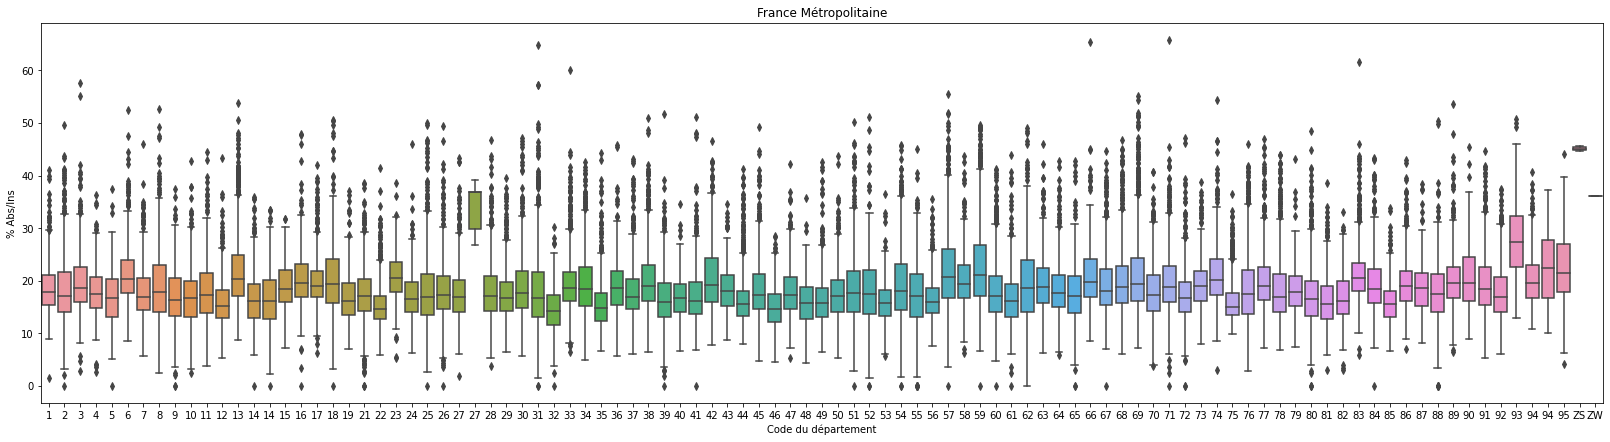

In [21]:
plt.figure(figsize=(28, 7))
sns.boxplot(
    
    x="Code du département",
    y="% Abs/Ins",
    data=bureaux_metro
).set_title('France Métropolitaine')

plt.show()
plt.close()

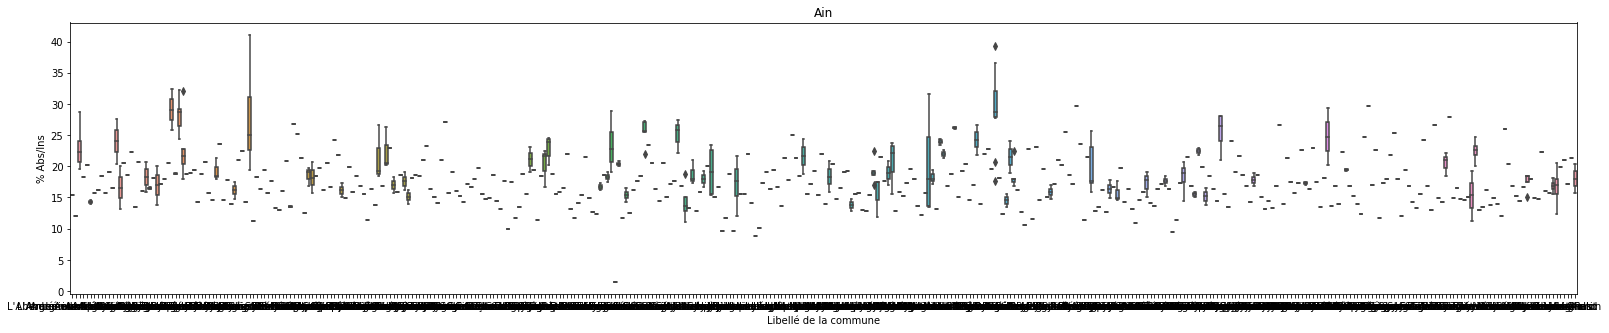

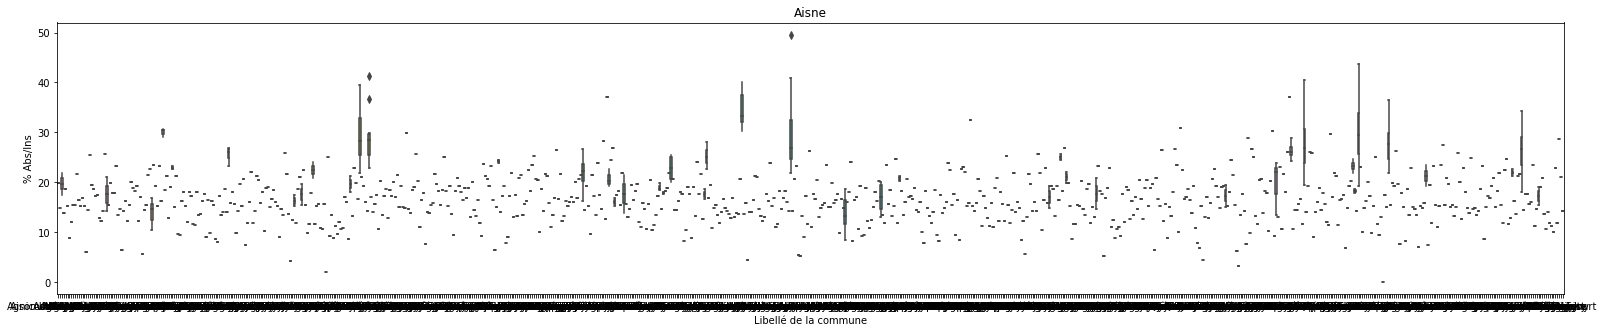

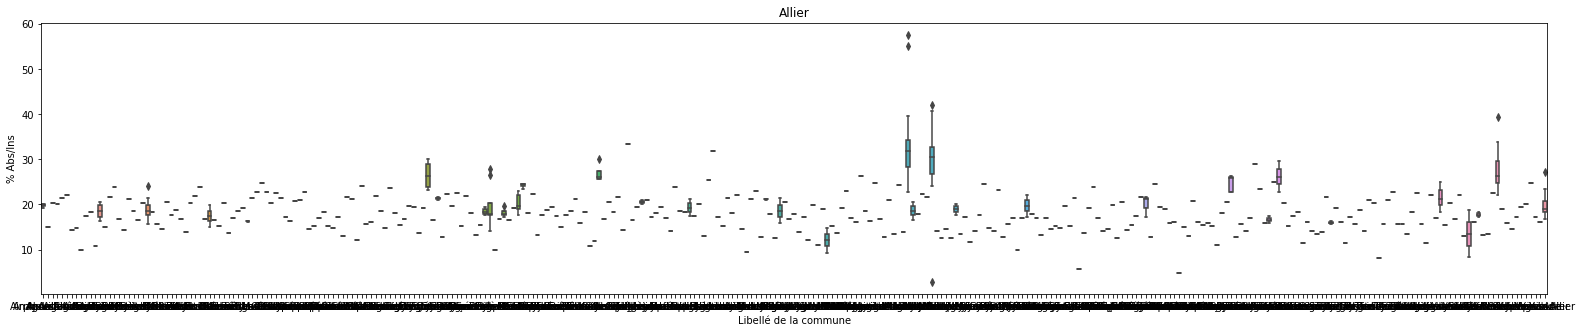

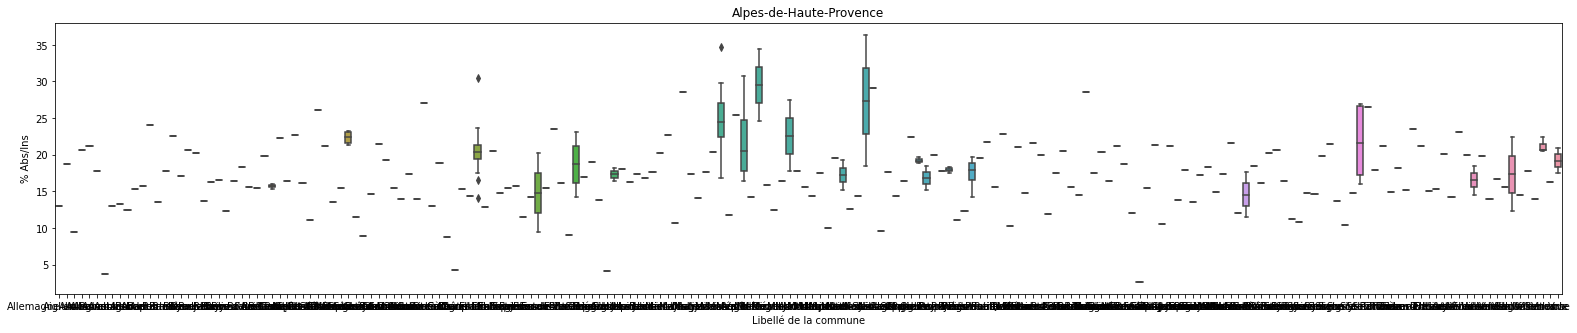

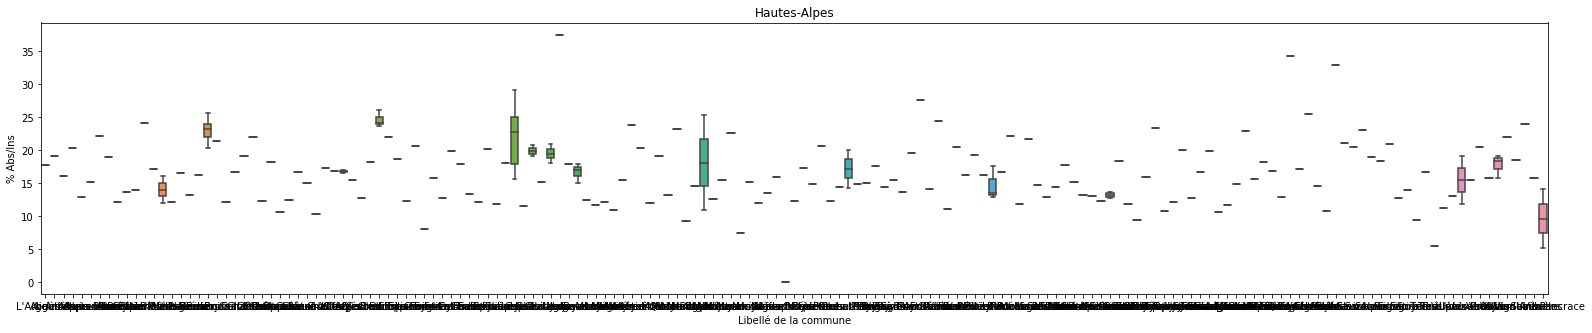

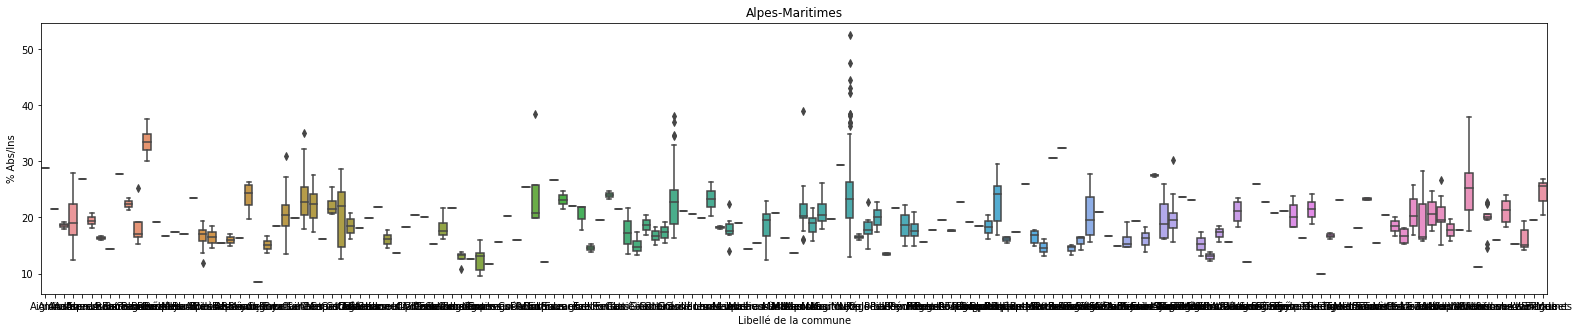

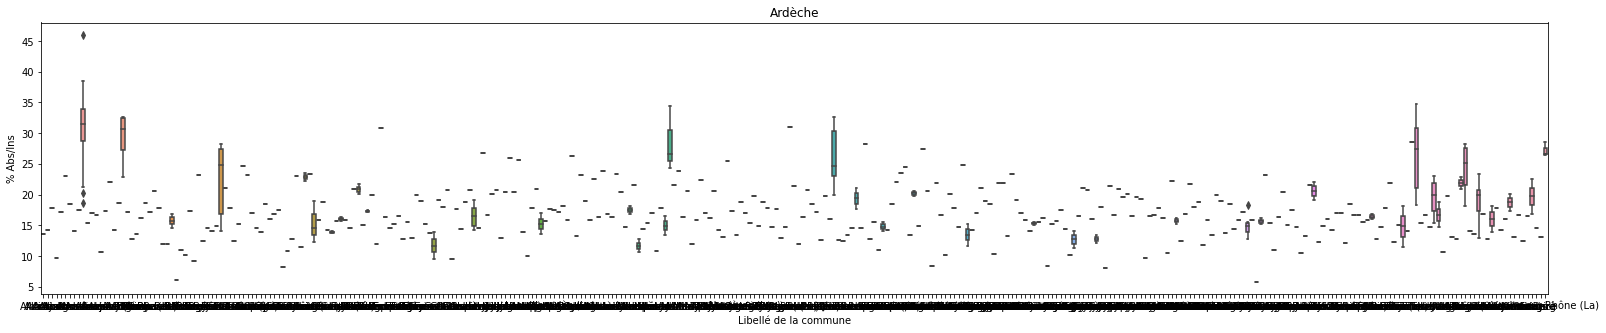

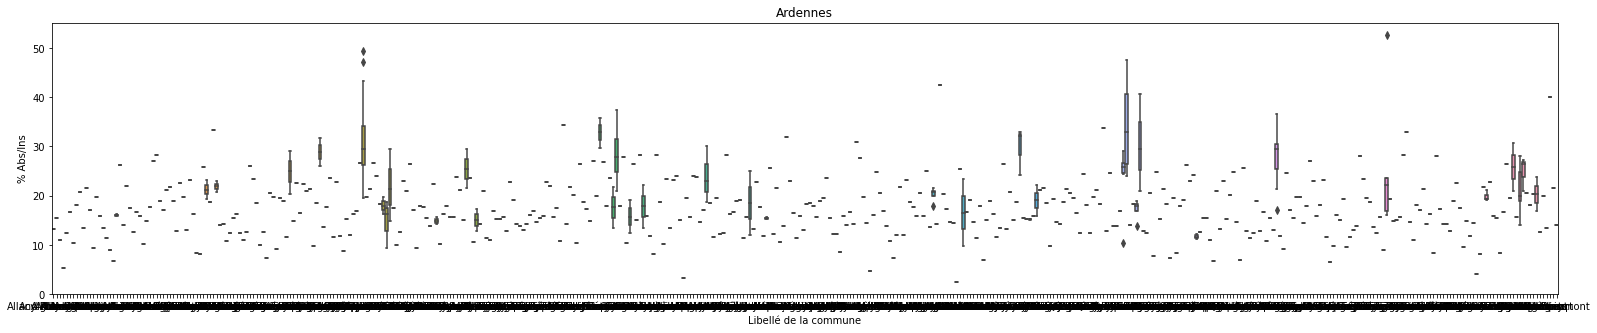

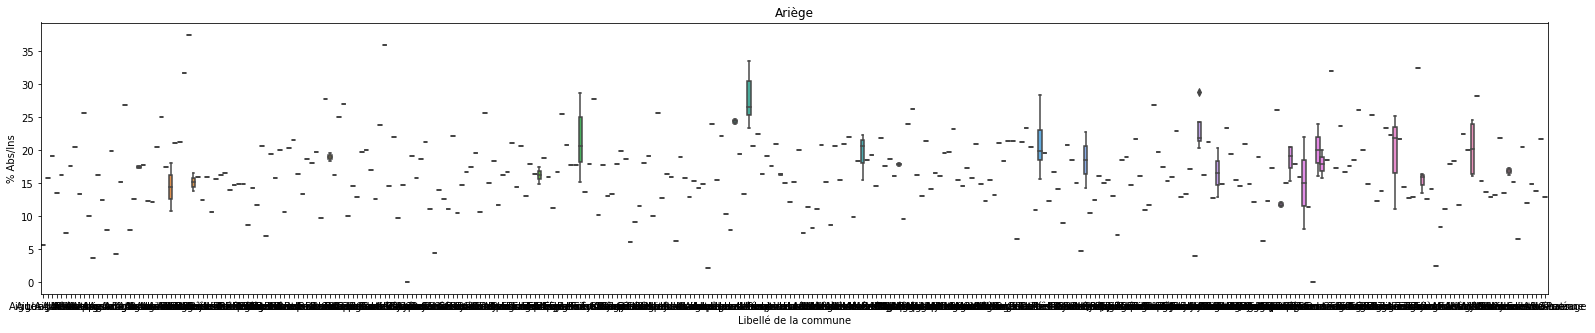

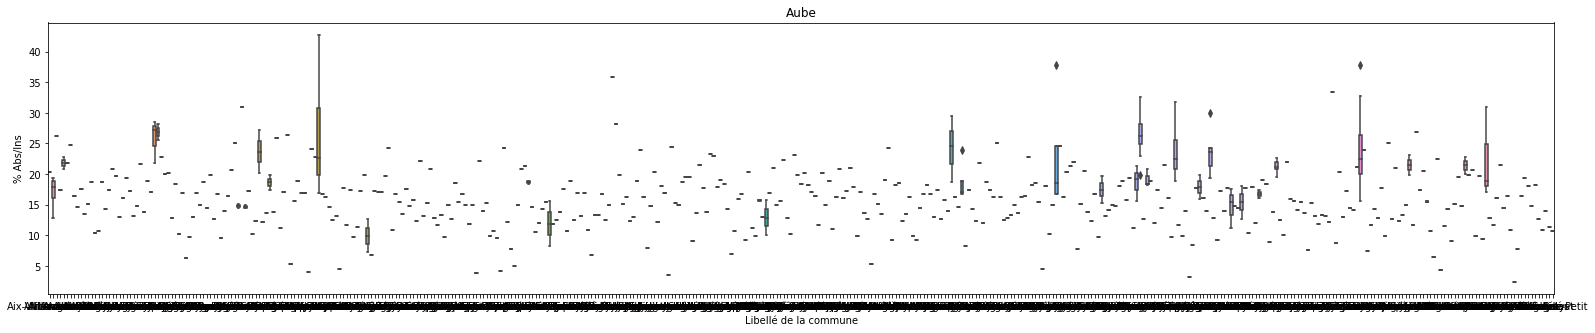

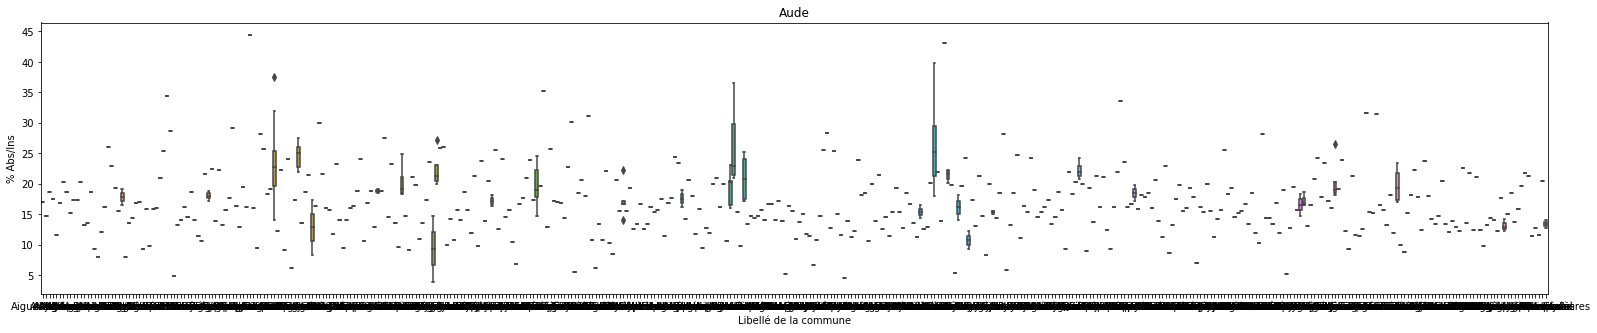

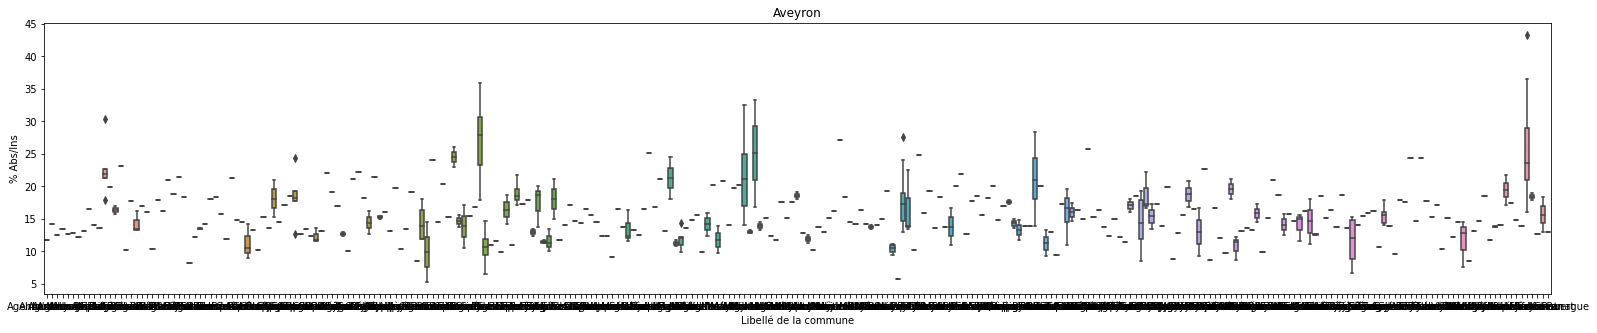

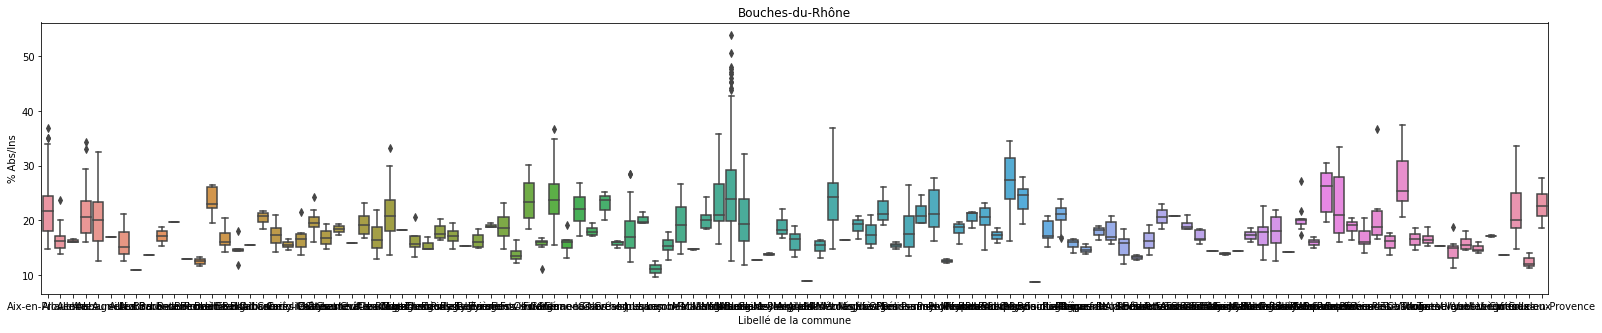

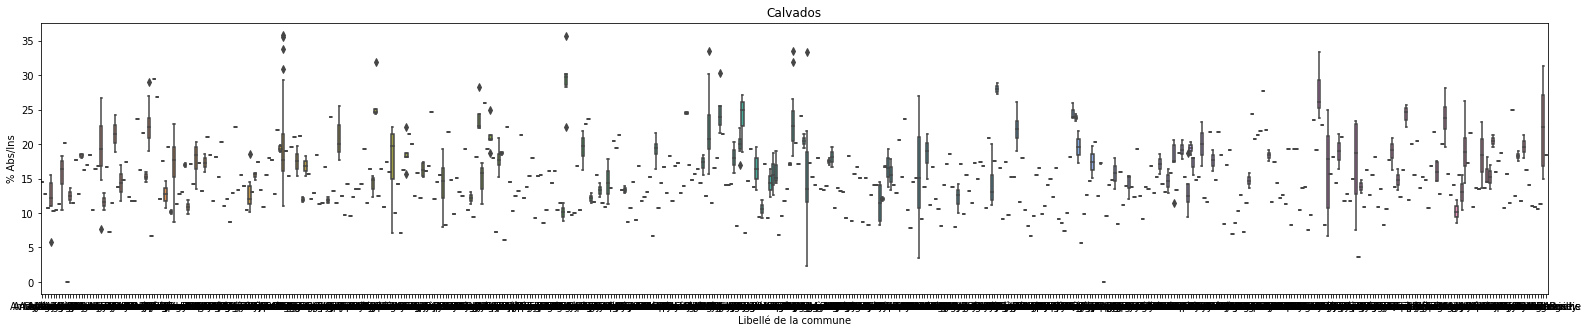

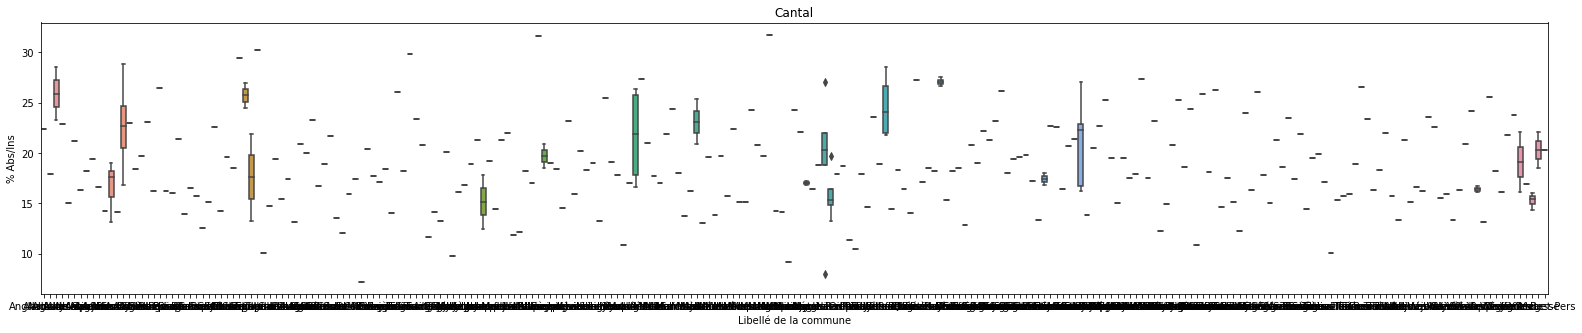

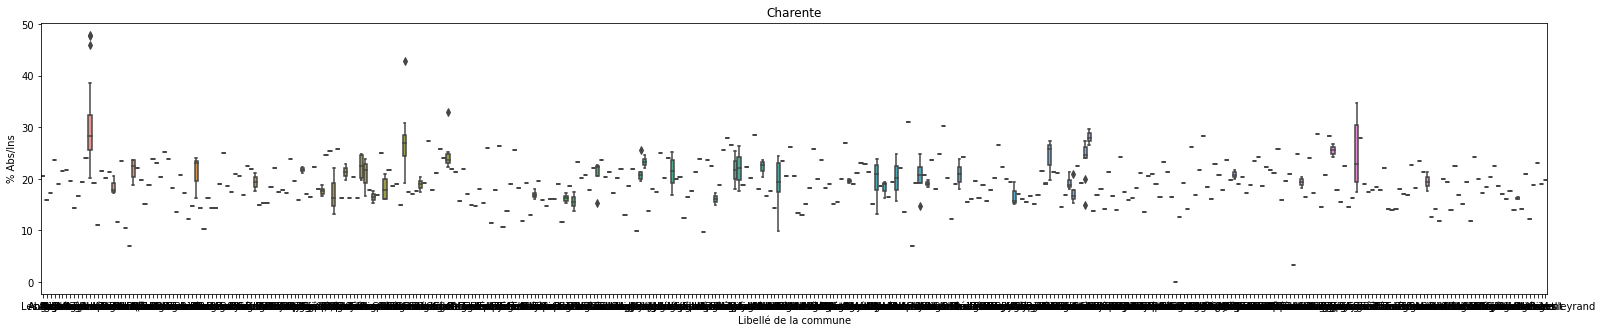

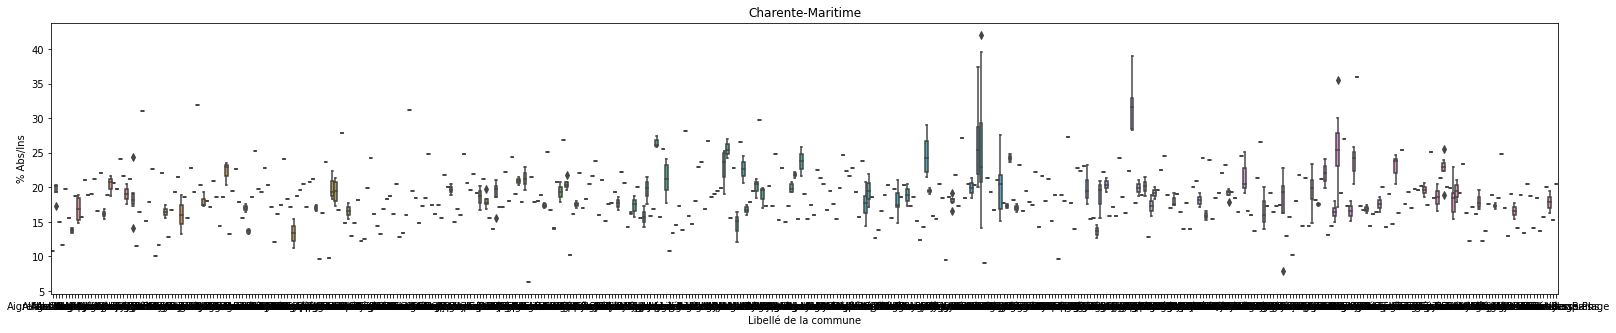

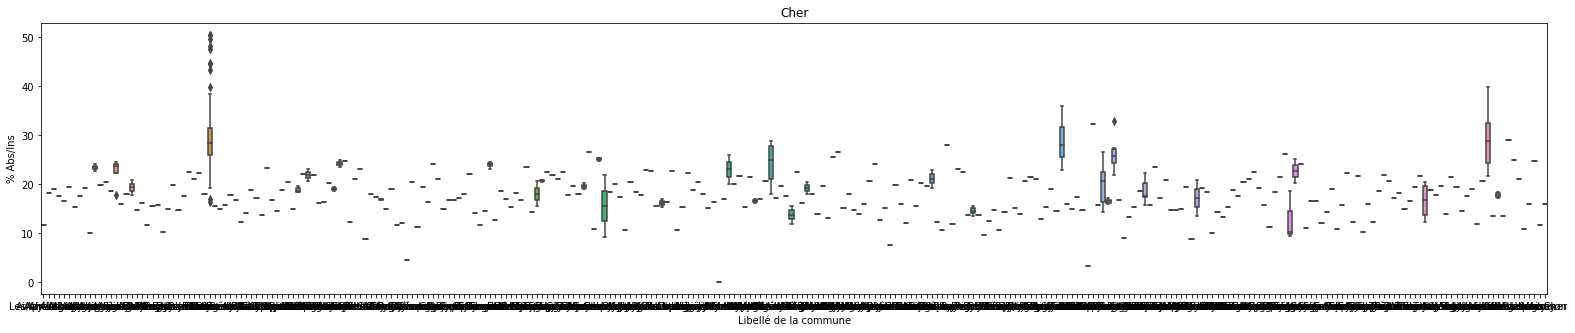

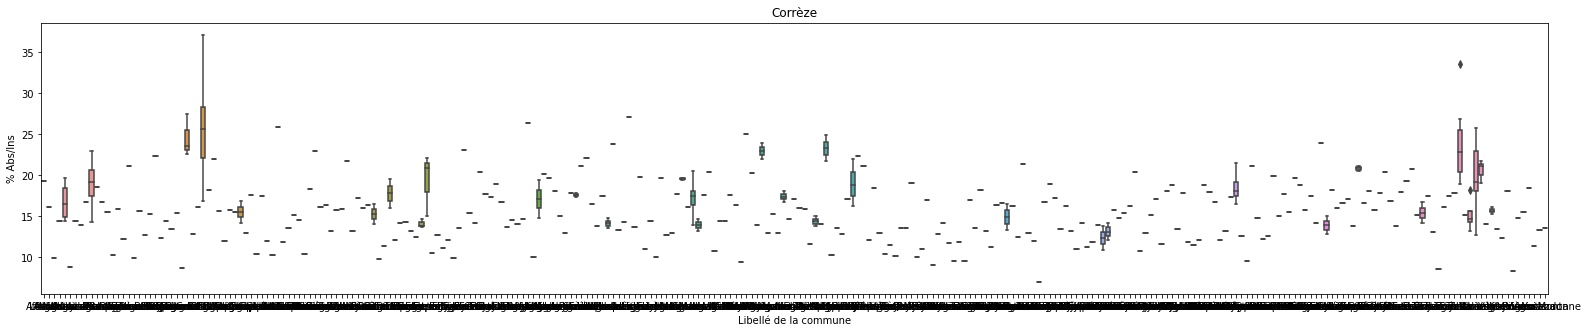

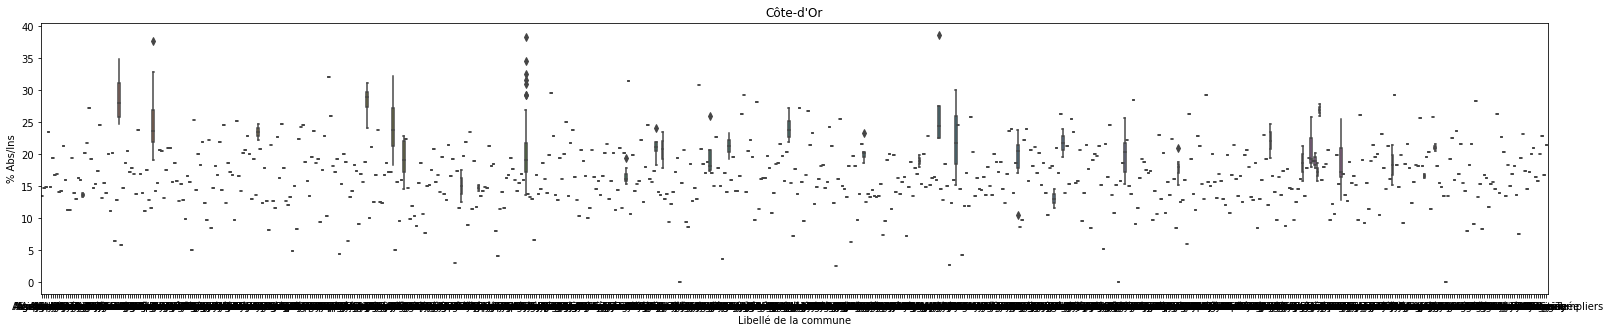

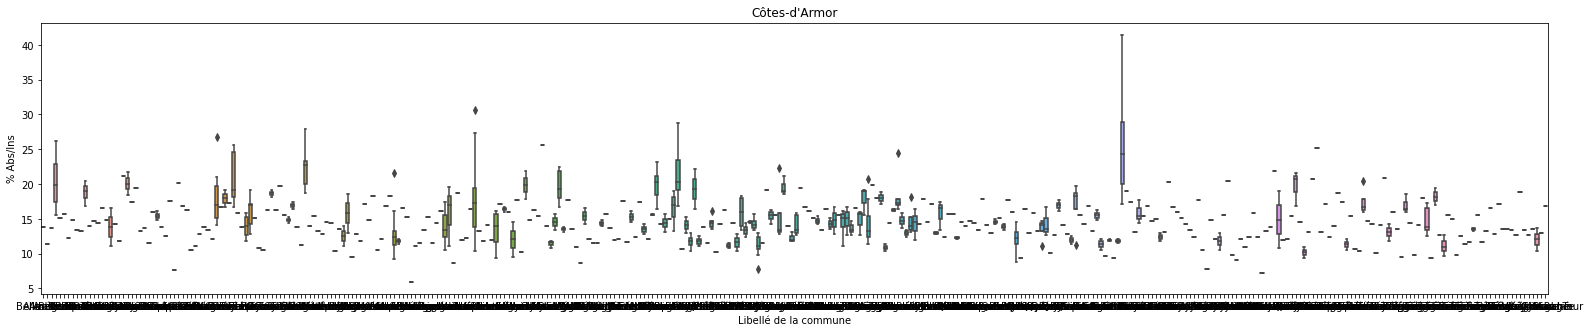

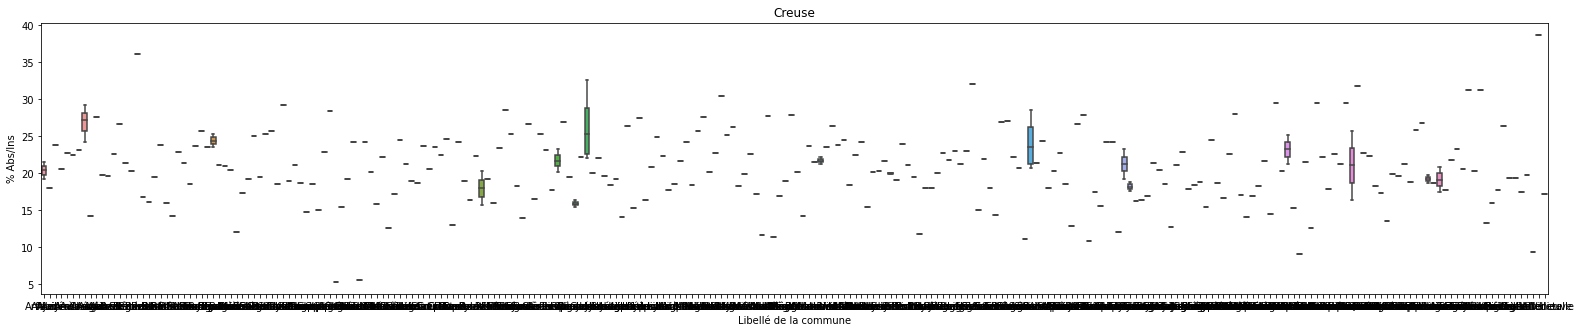

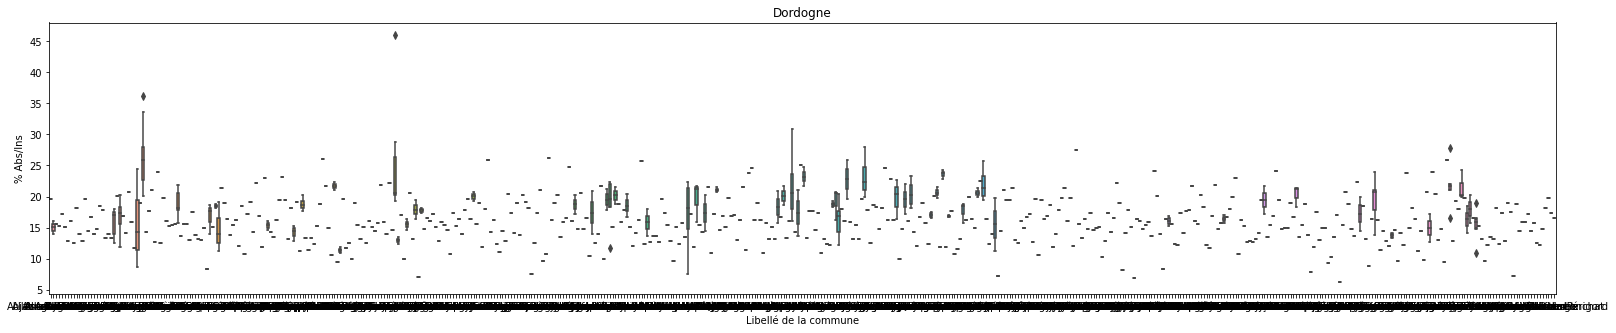

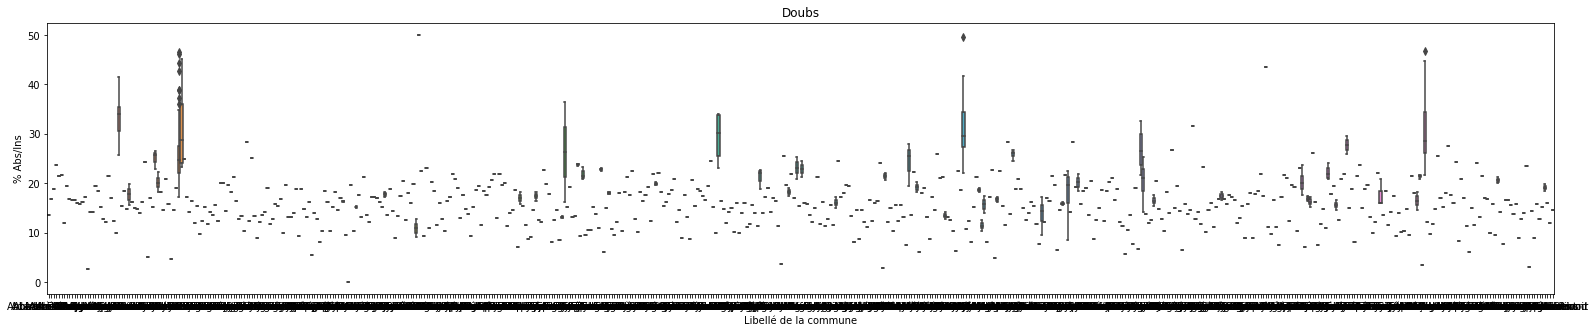

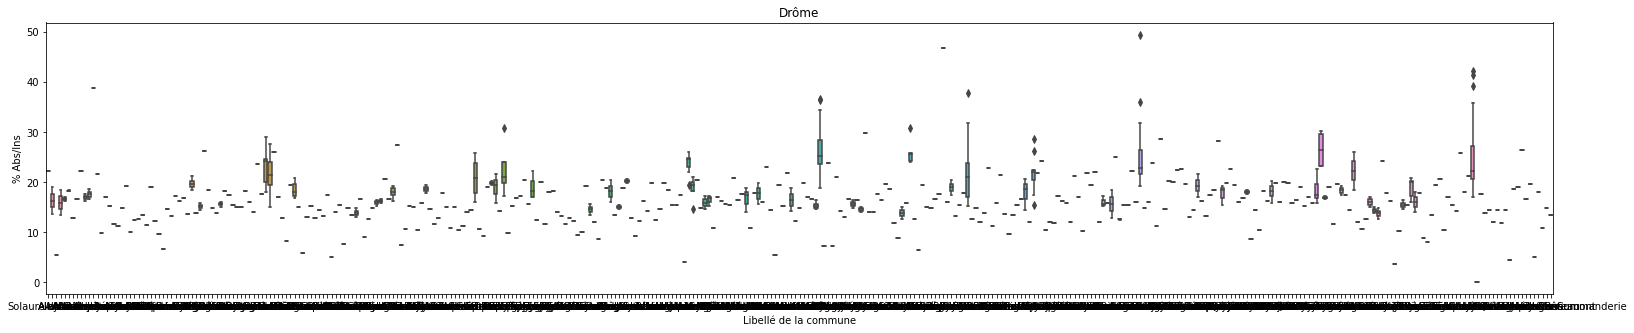

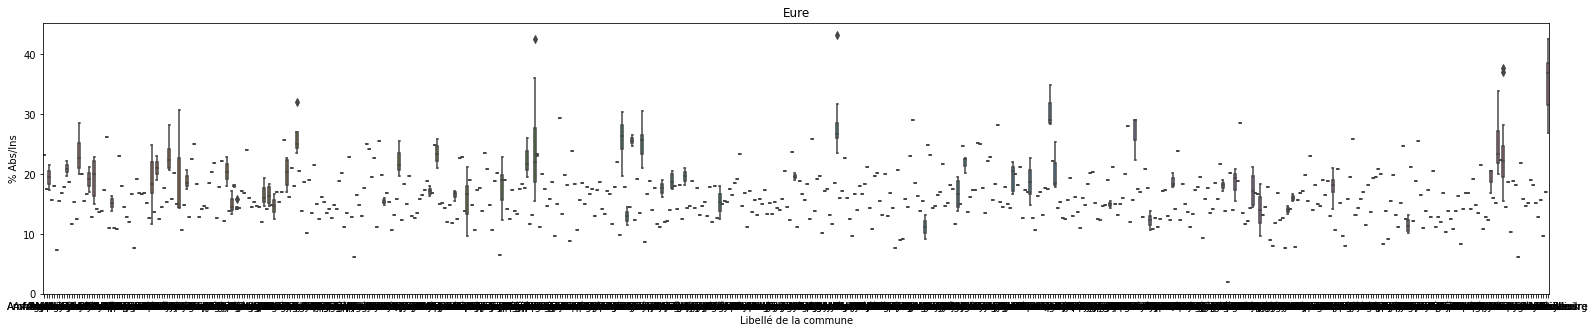

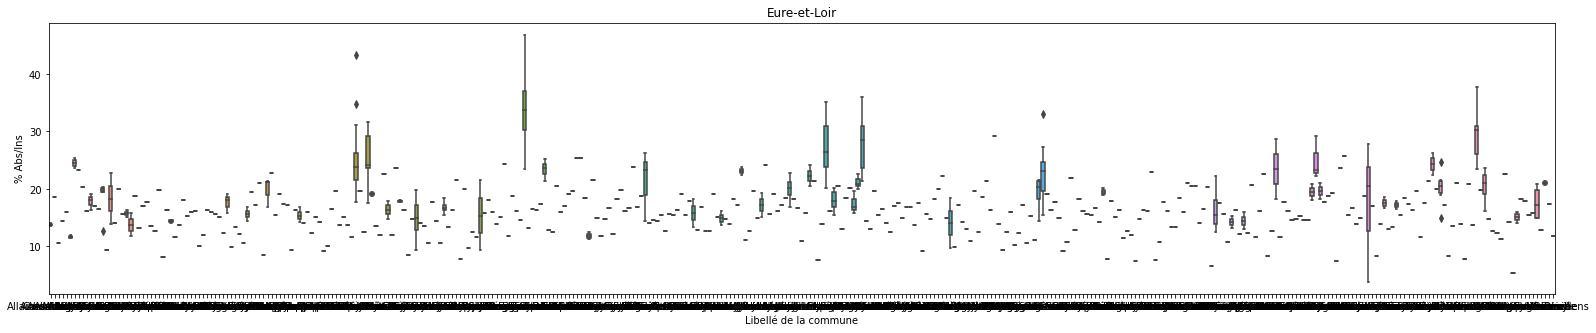

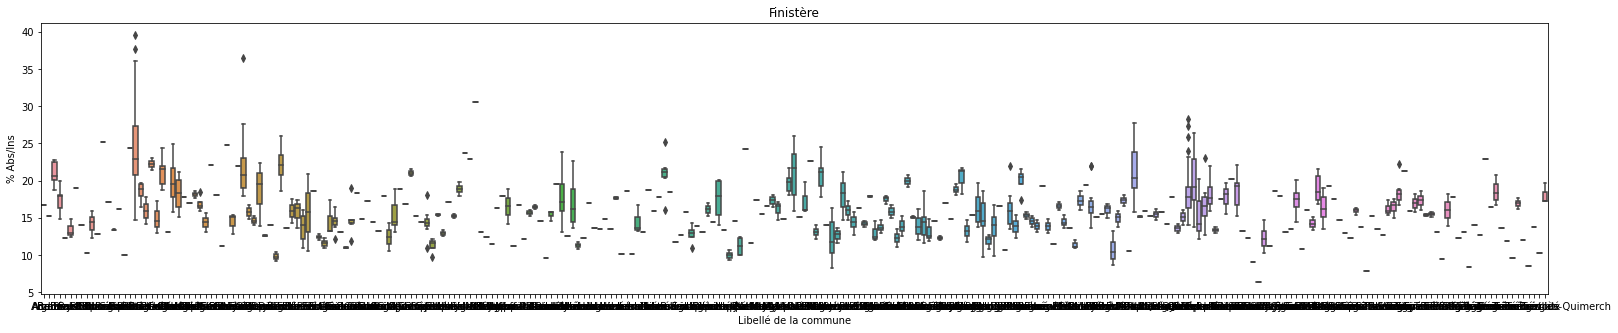

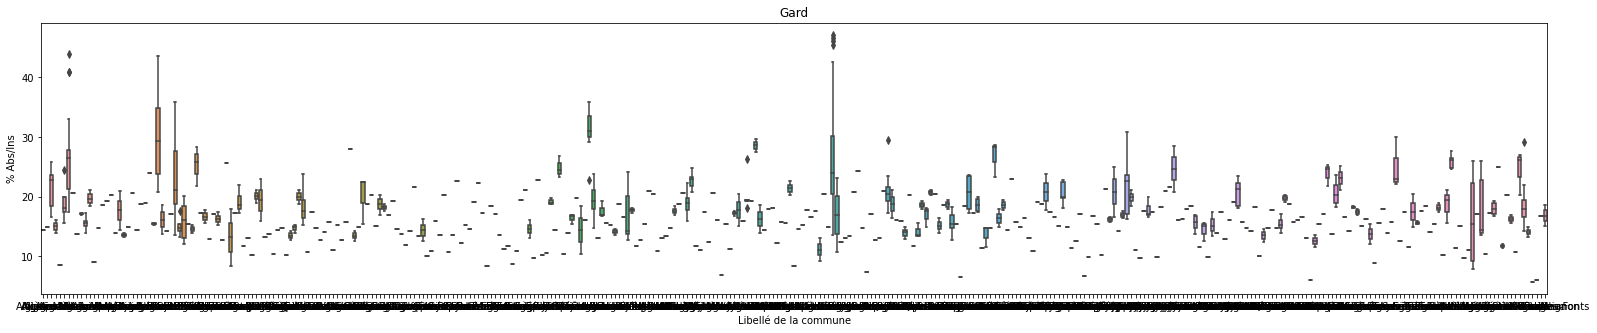

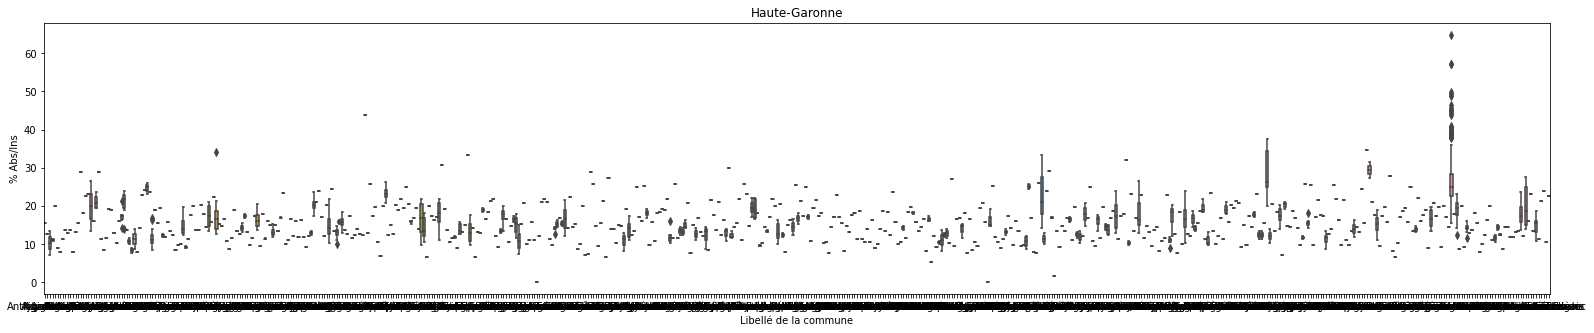

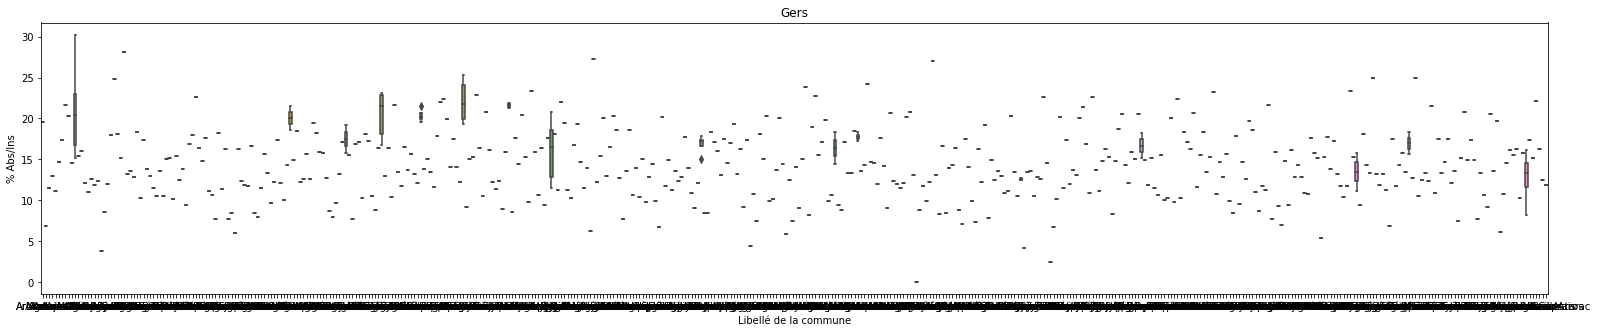

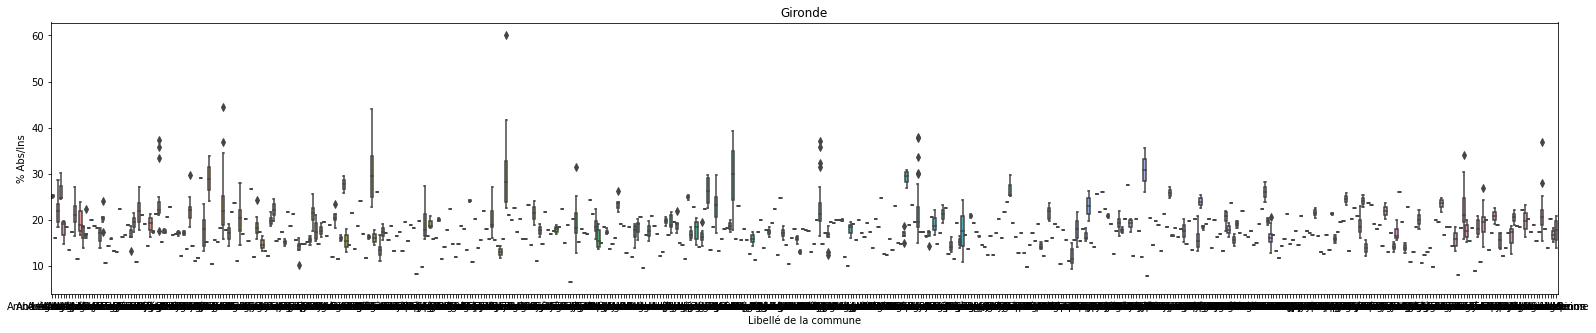

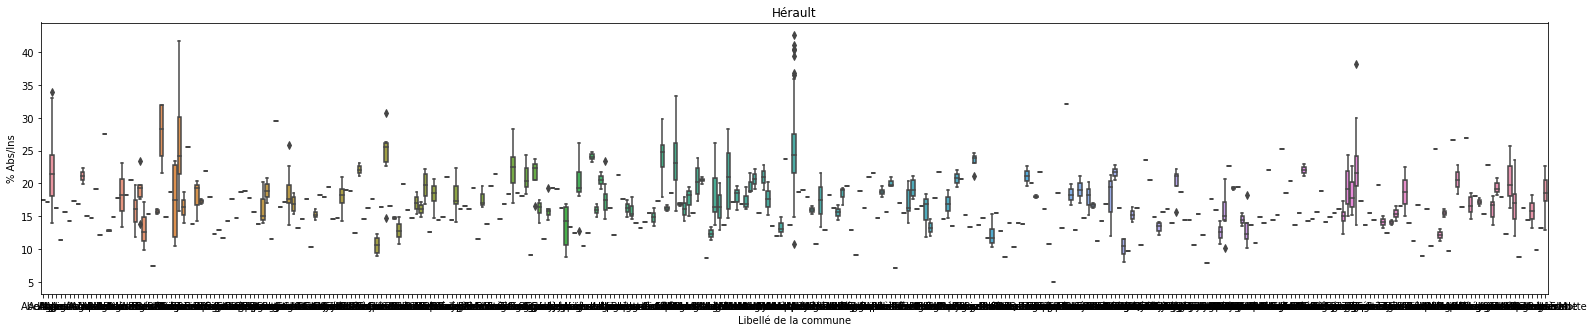

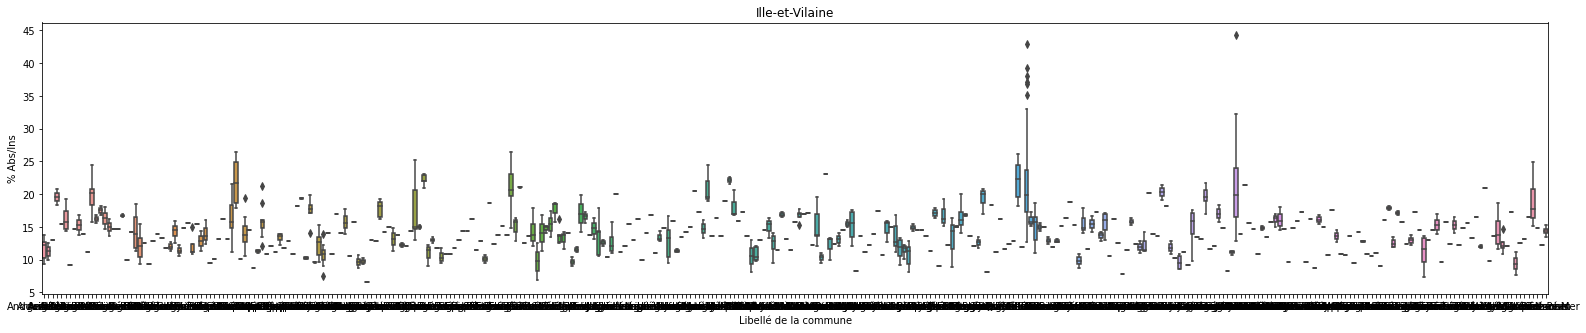

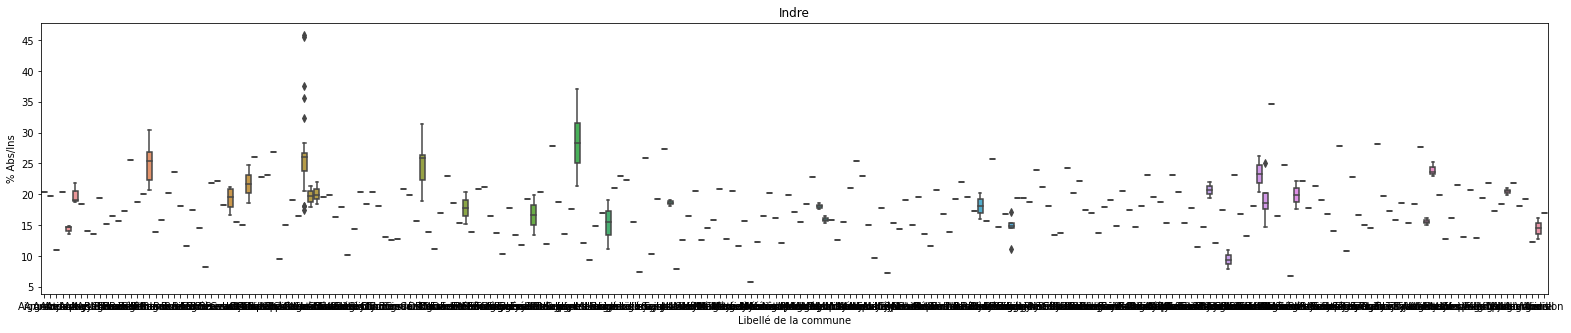

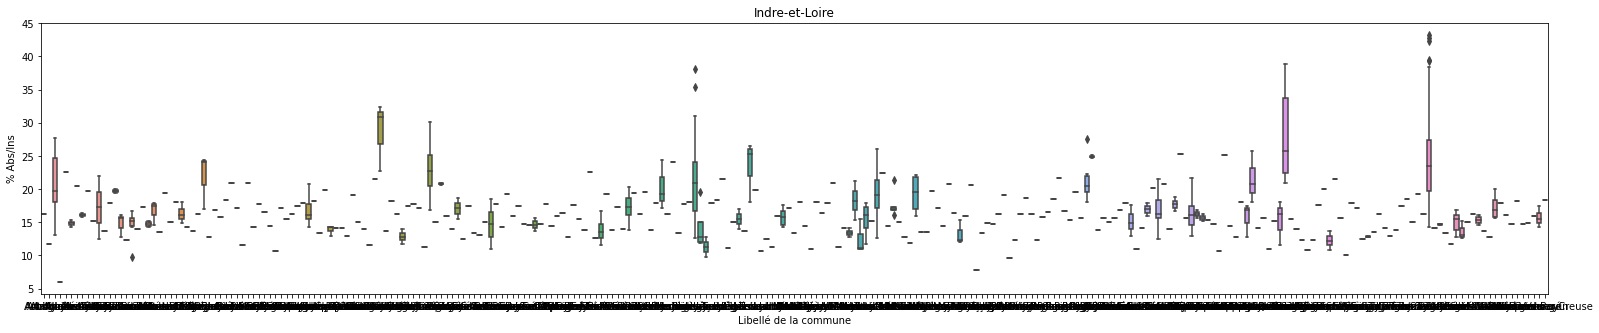

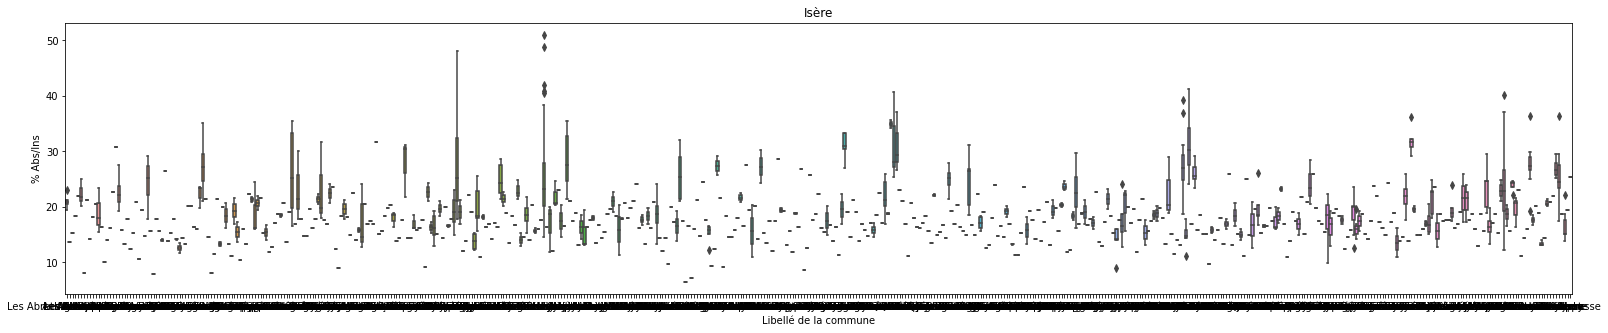

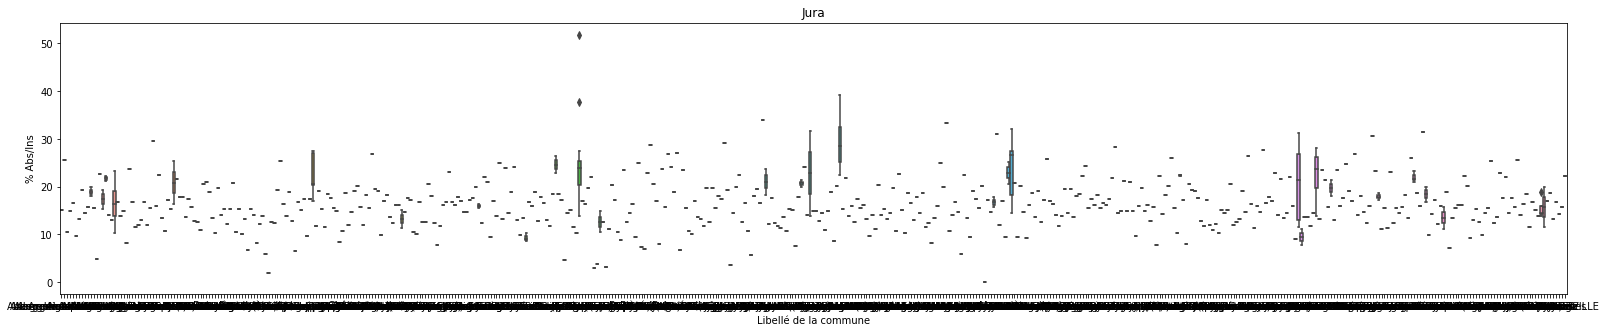

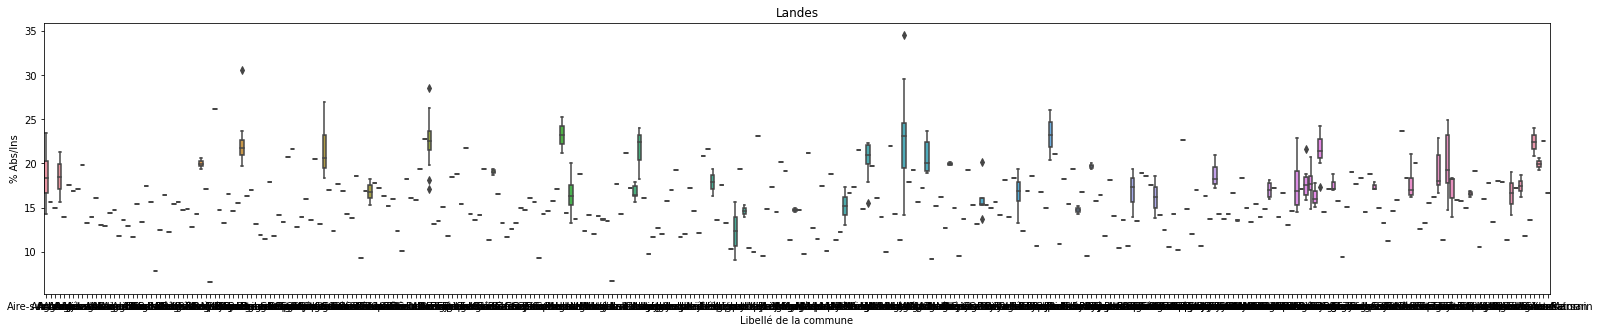

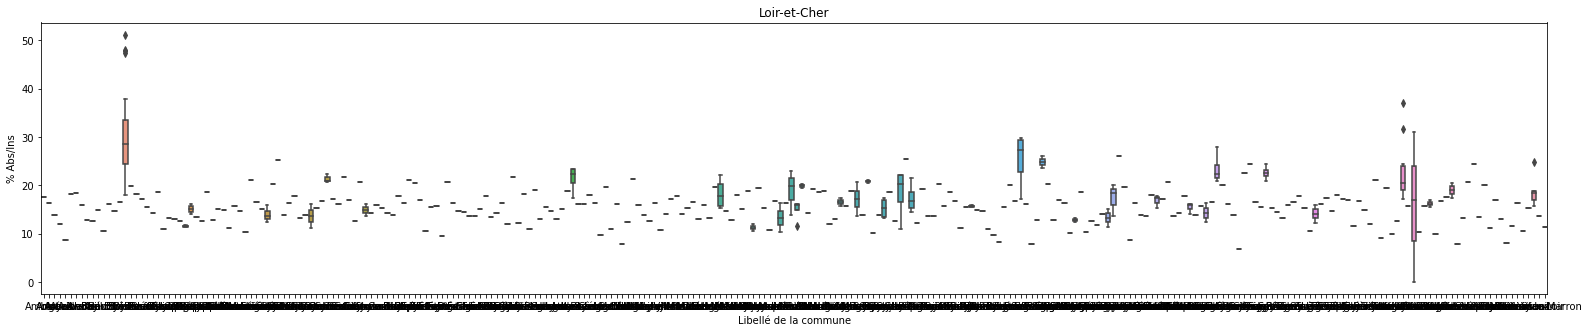

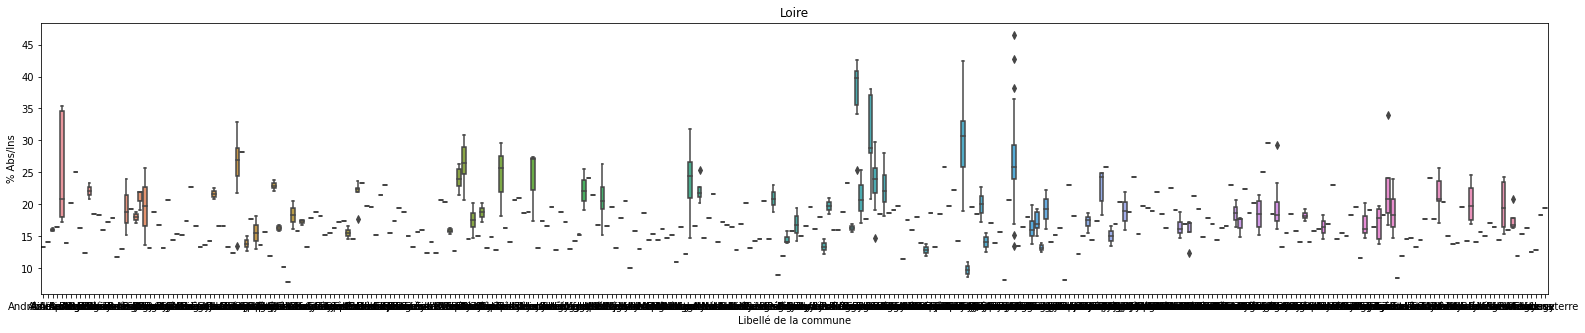

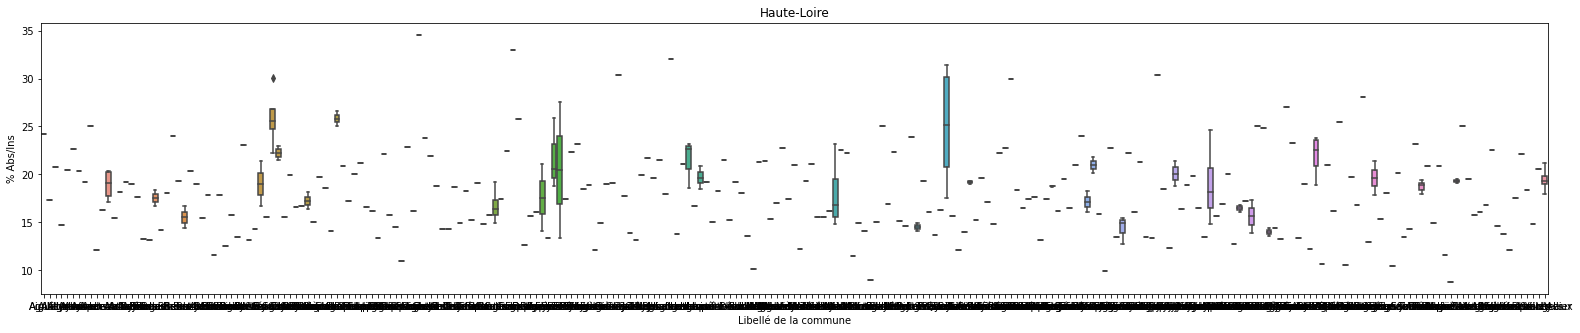

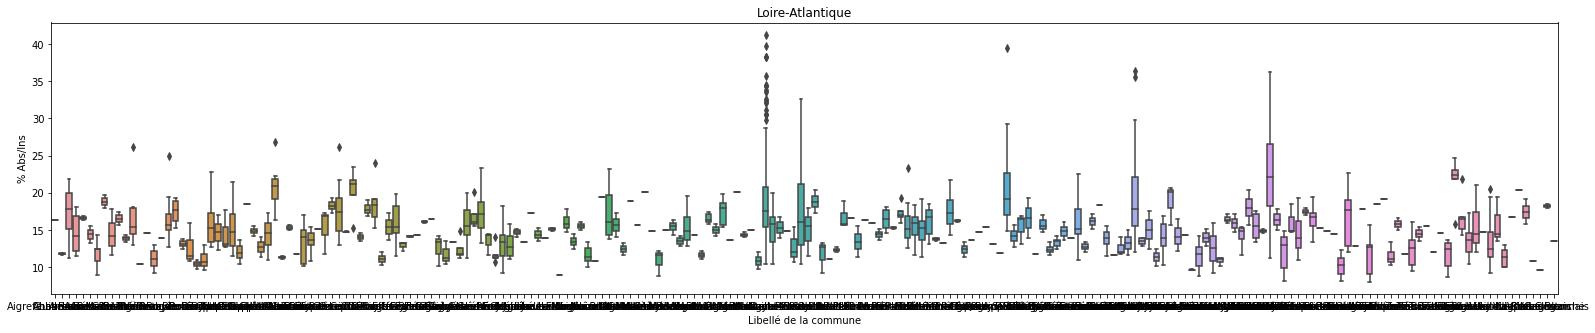

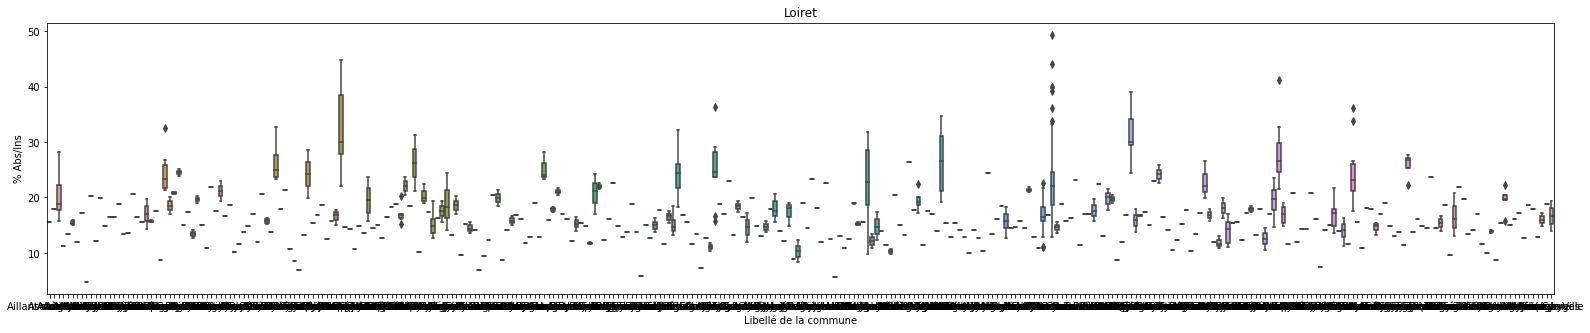

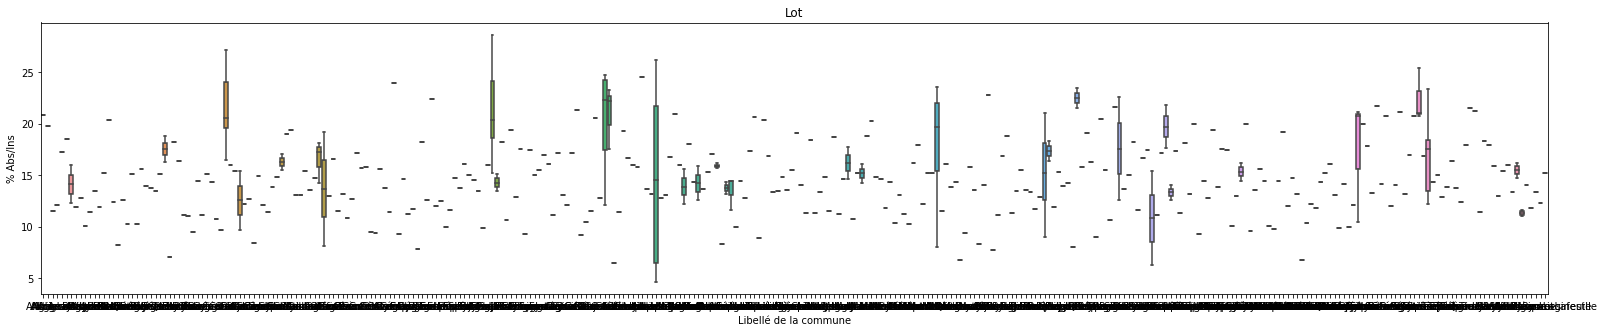

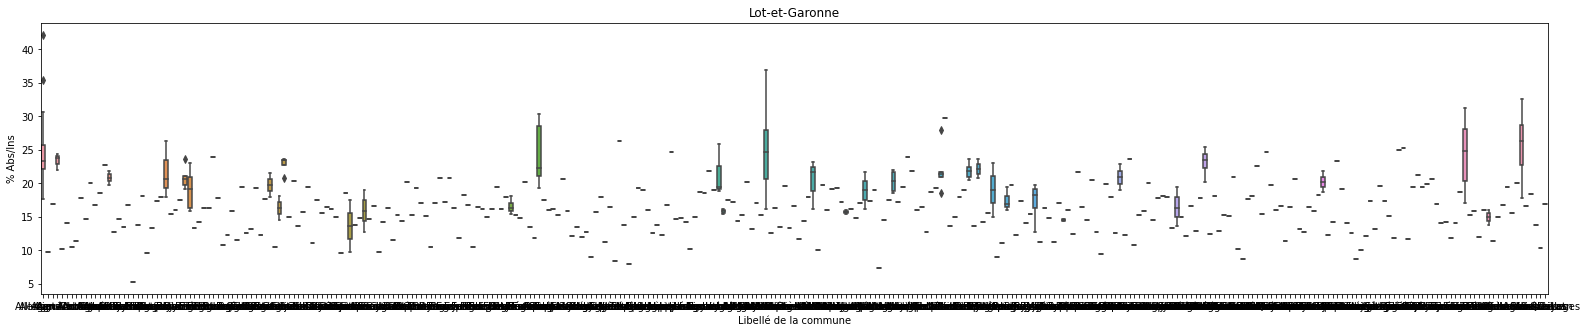

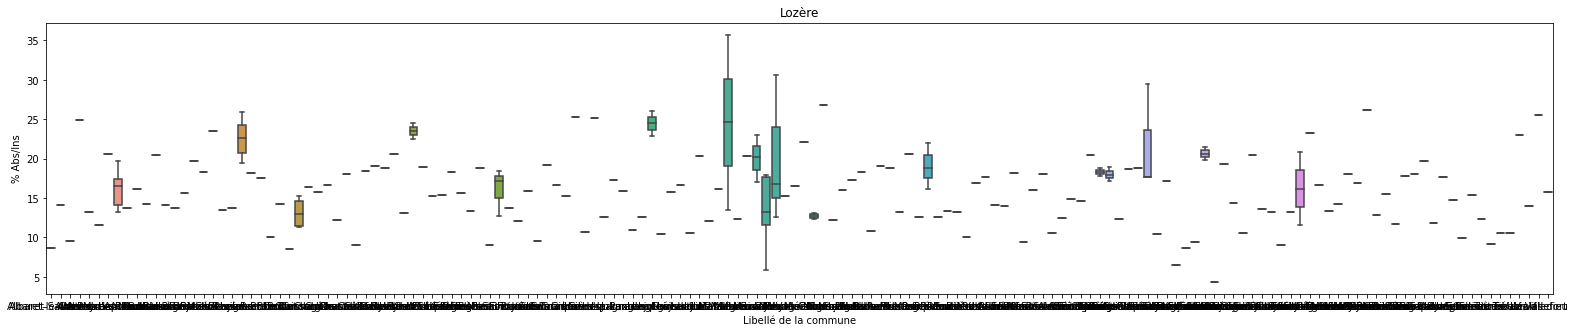

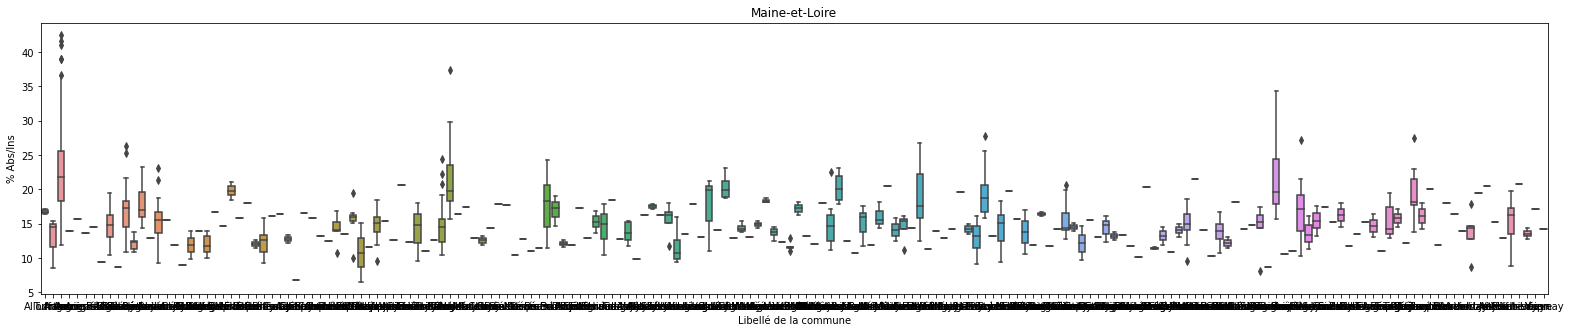

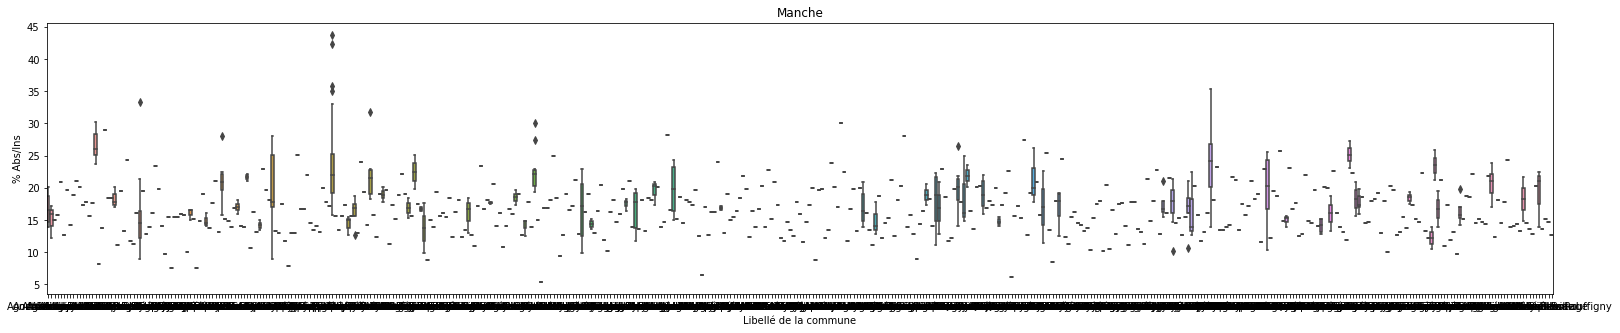

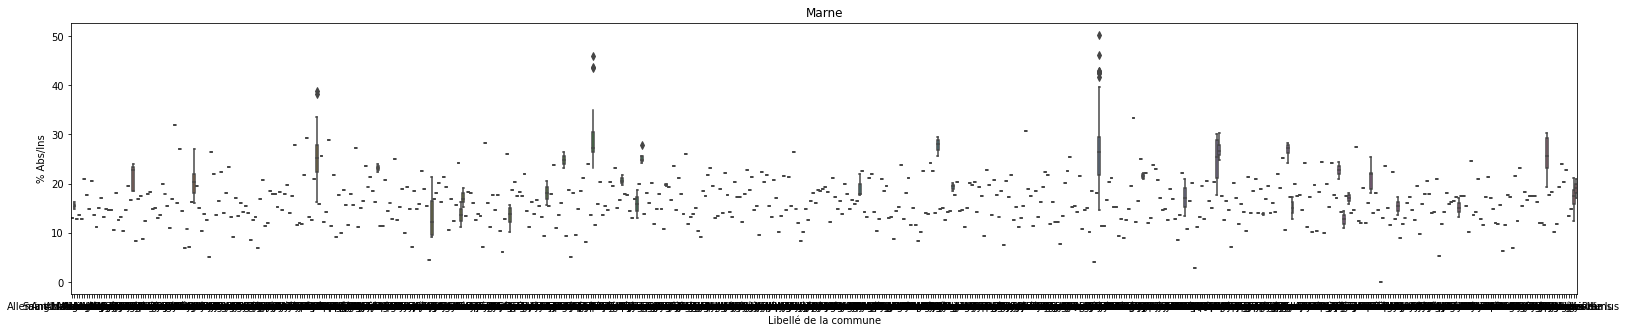

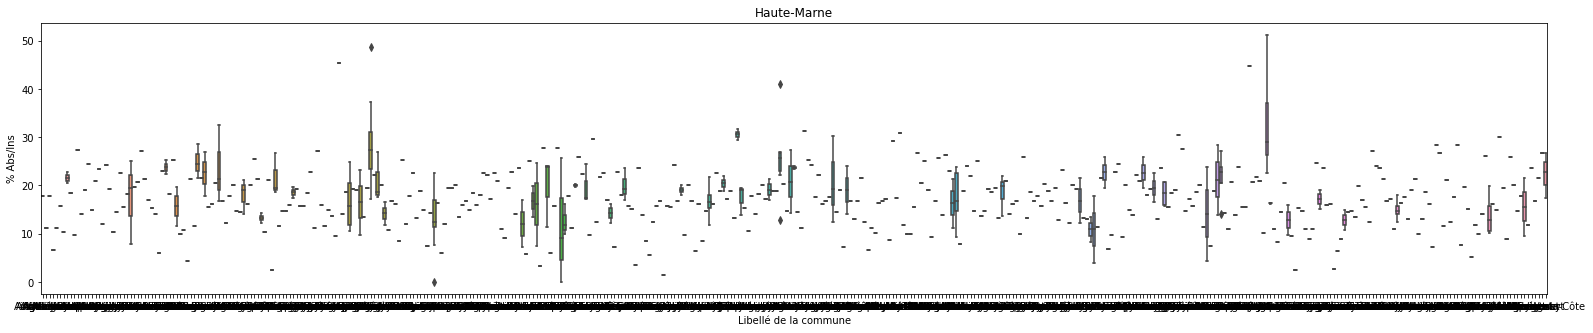

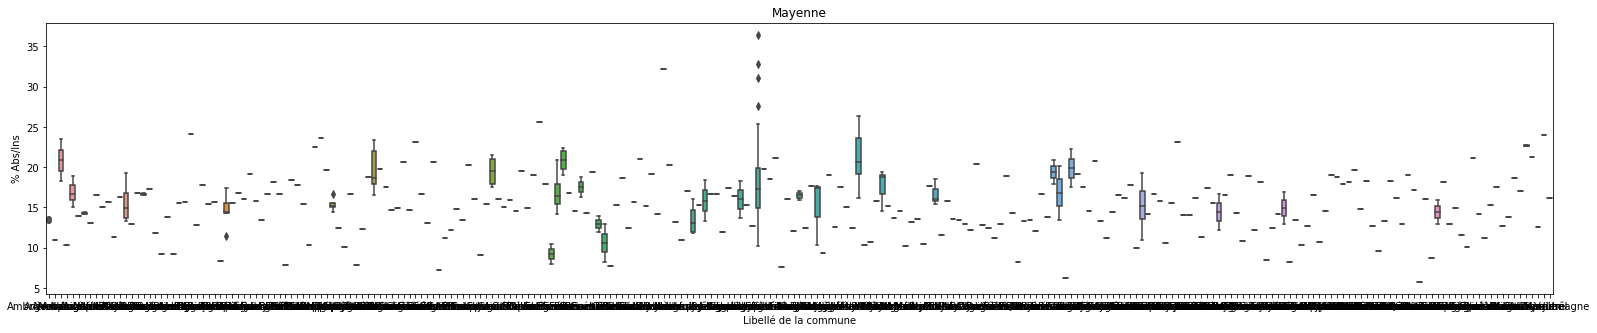

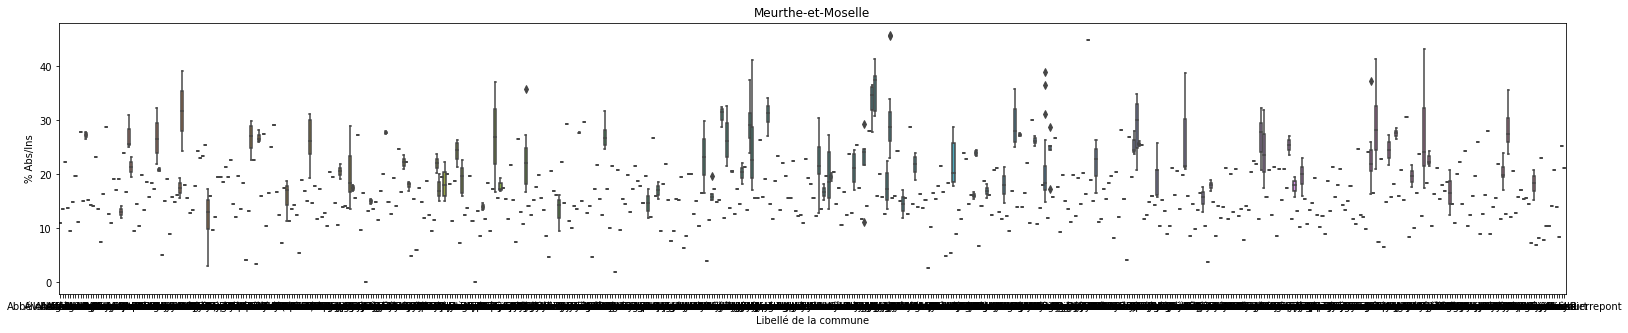

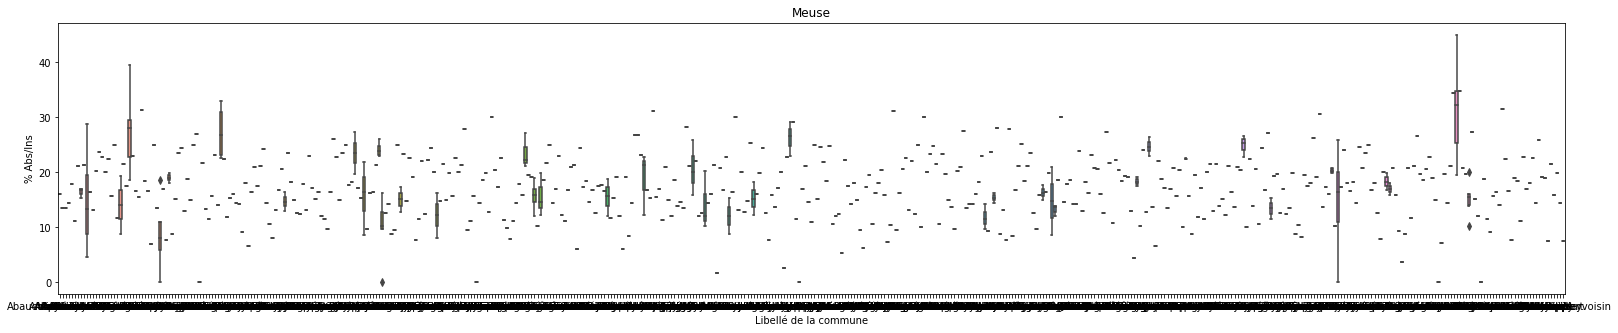

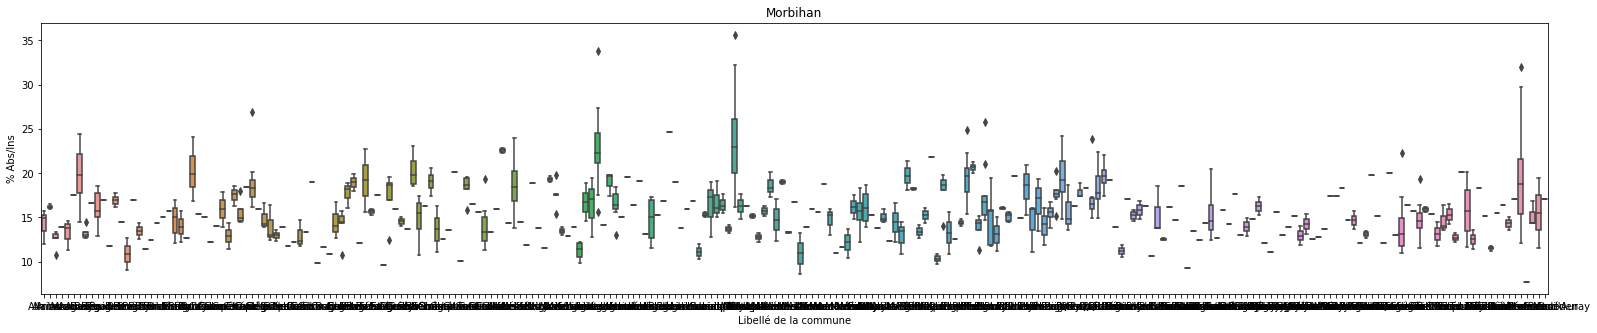

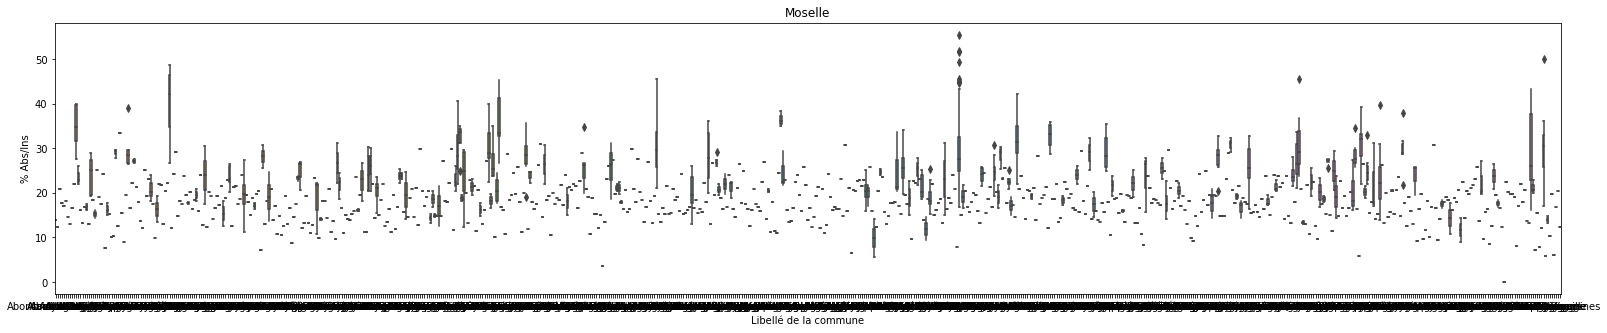

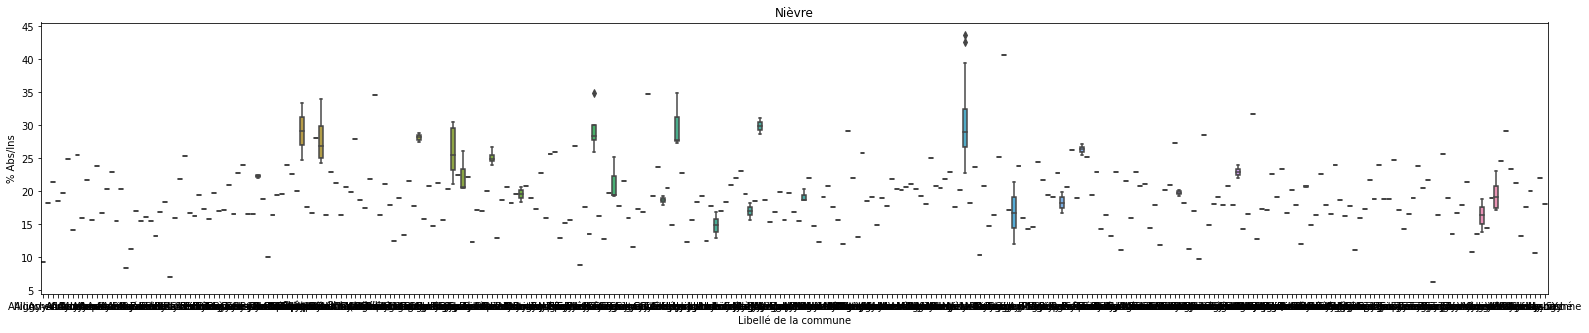

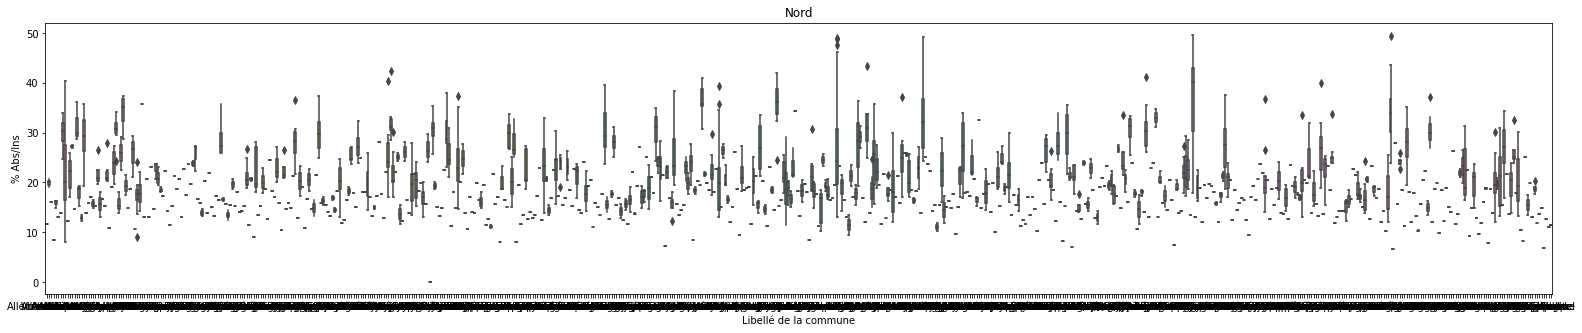

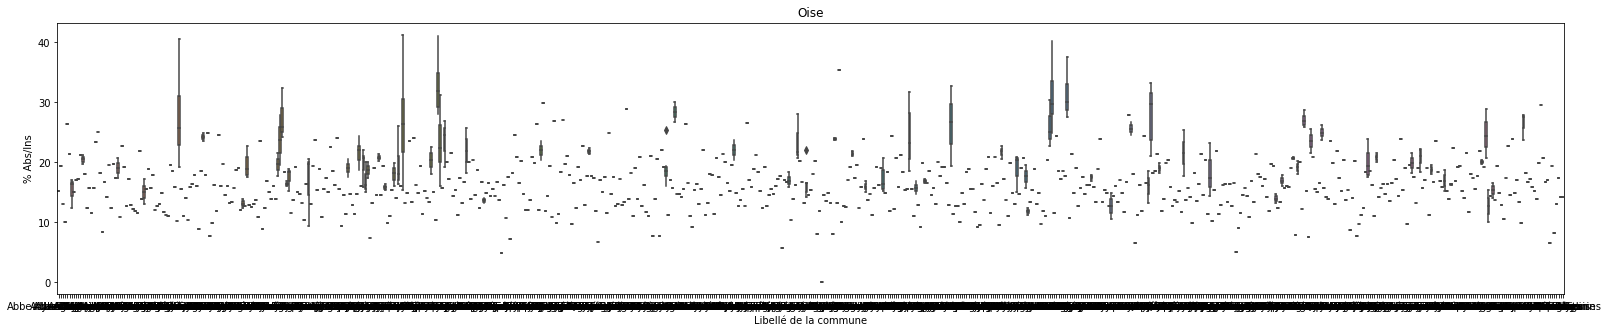

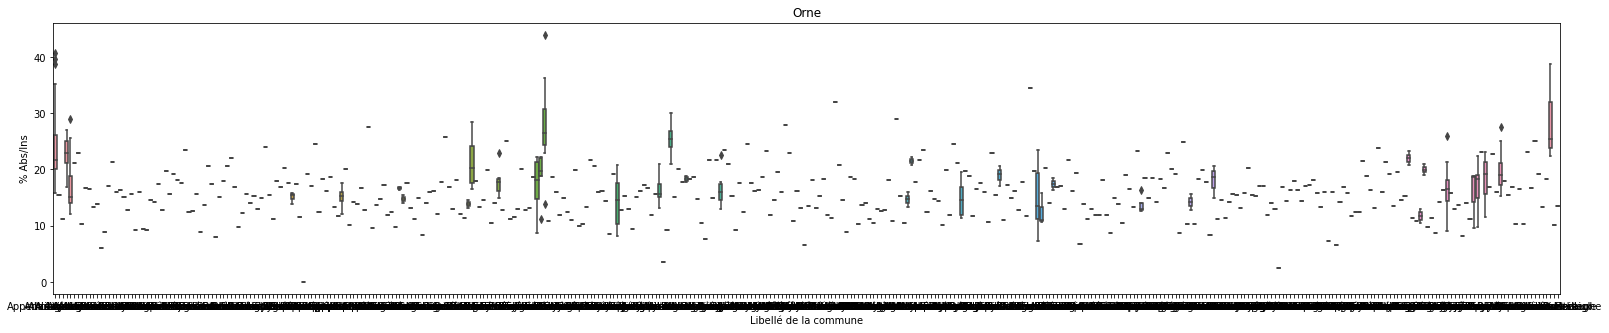

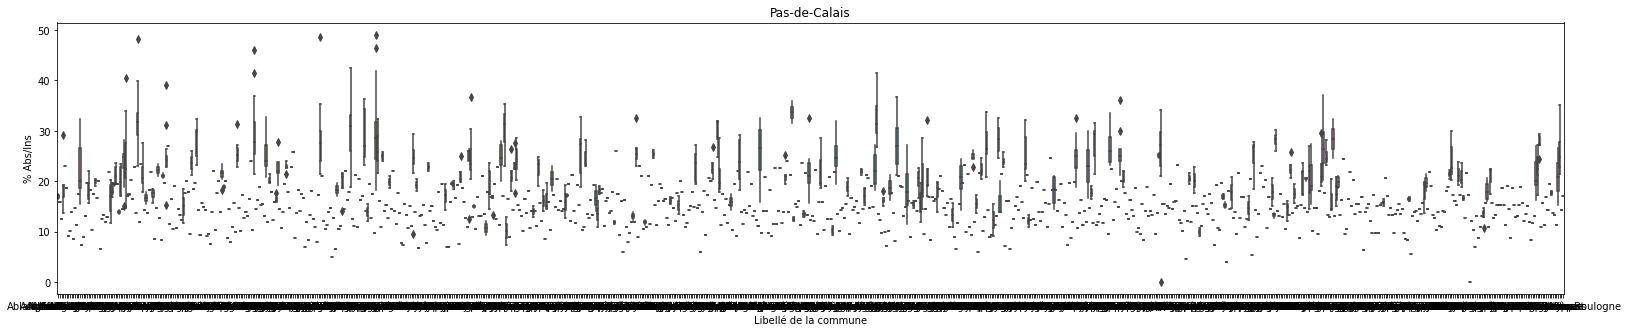

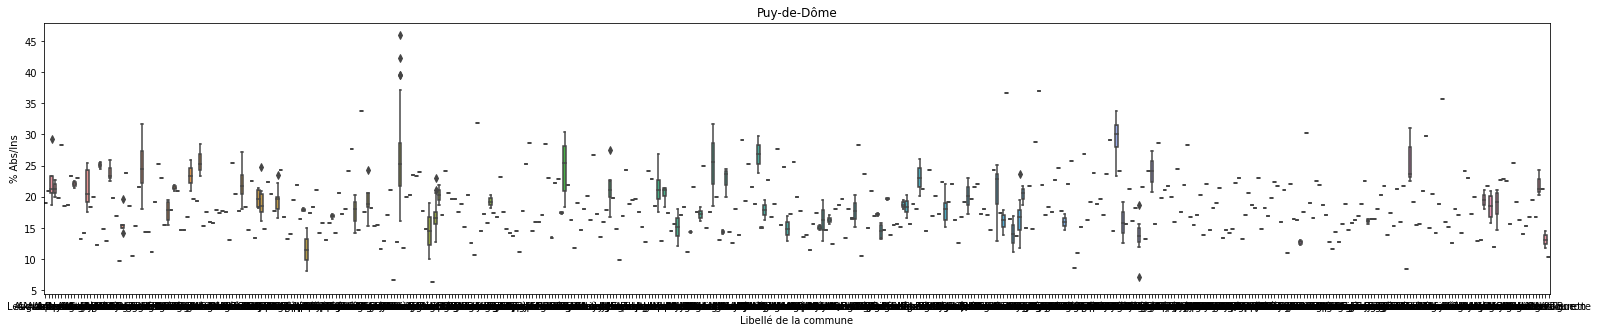

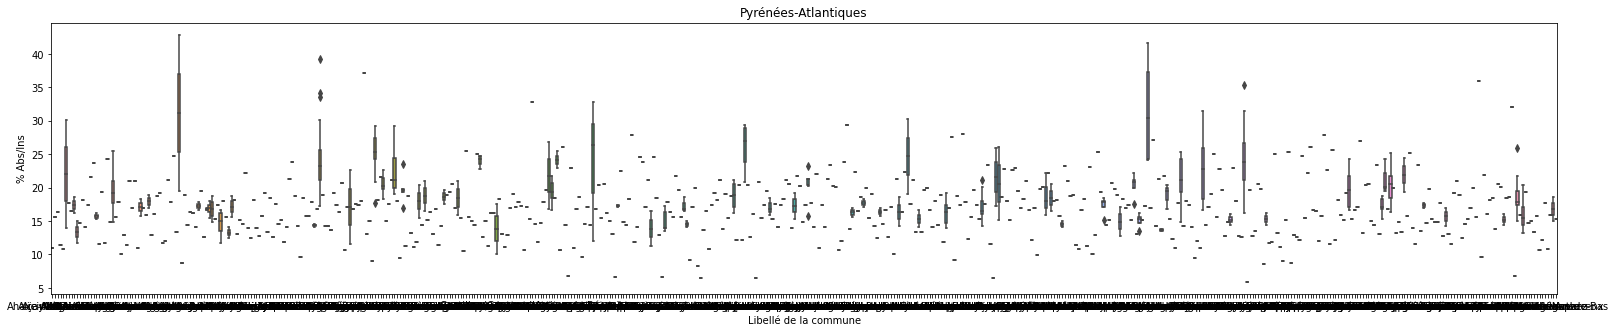

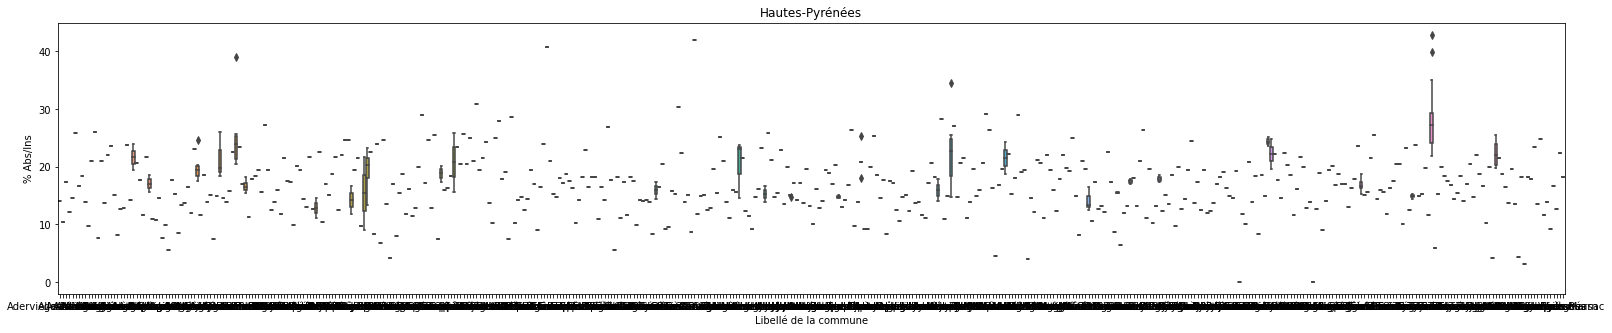

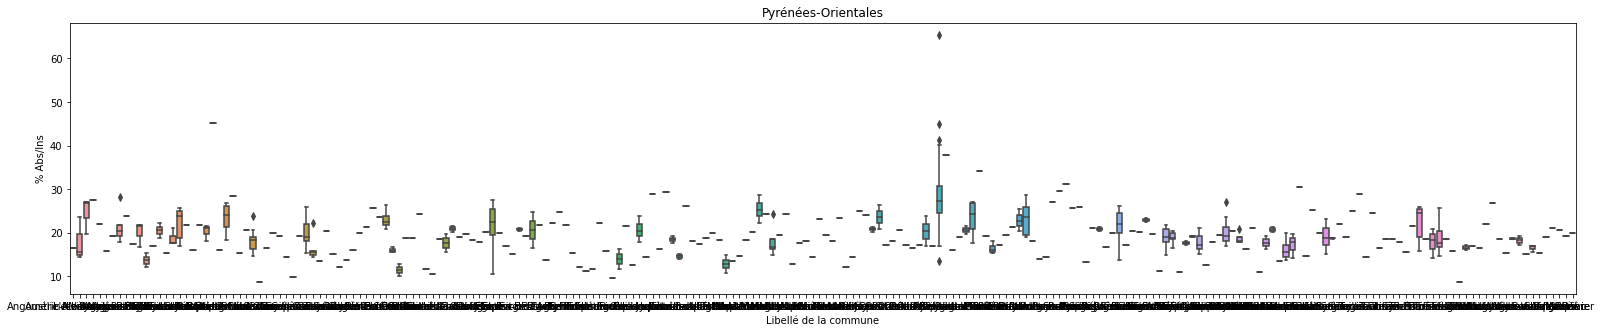

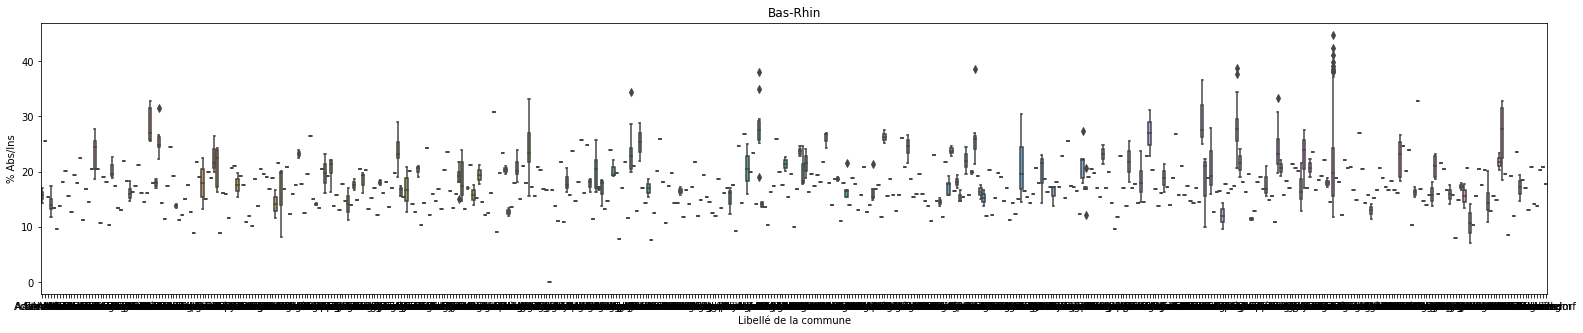

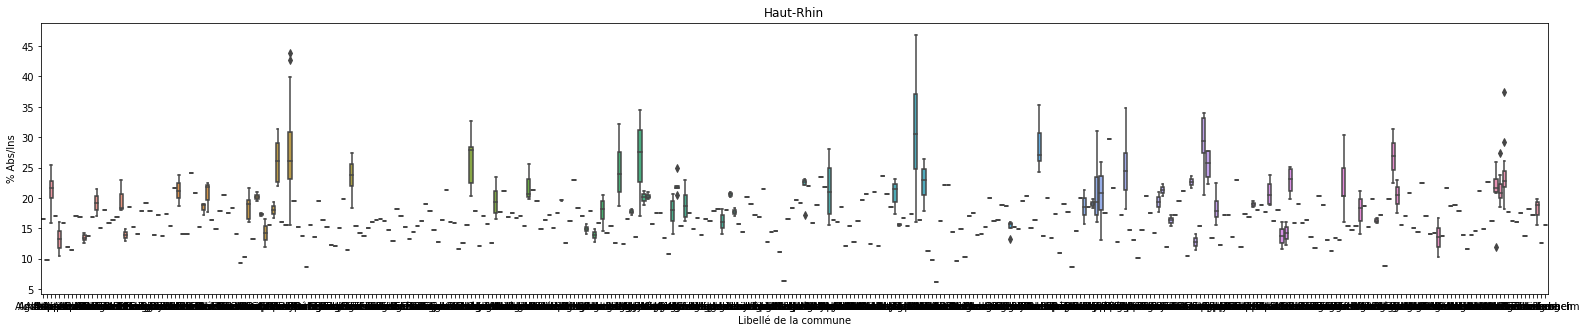

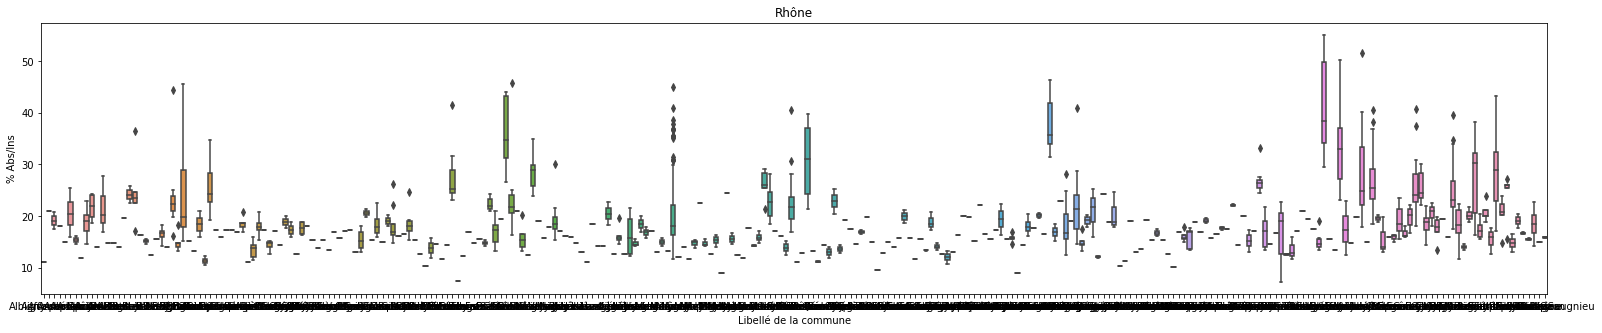

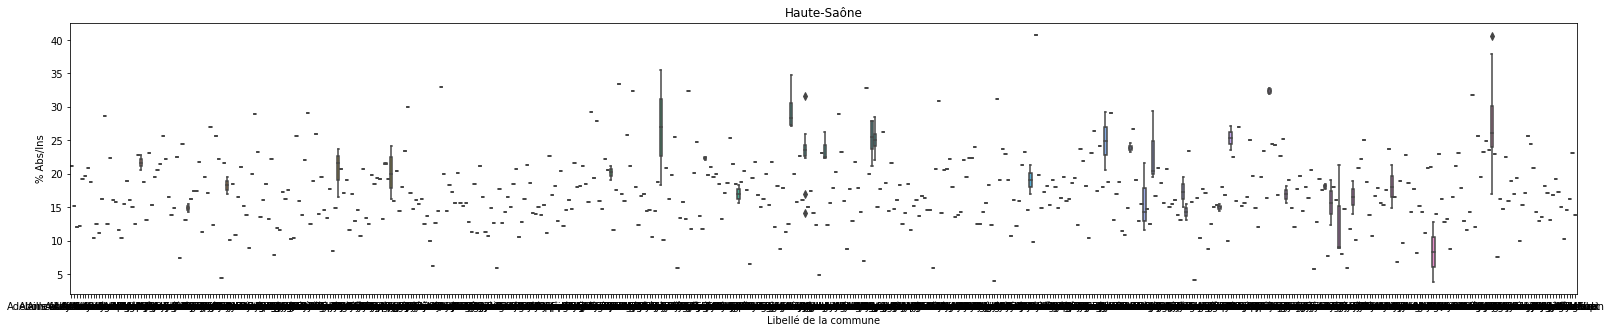

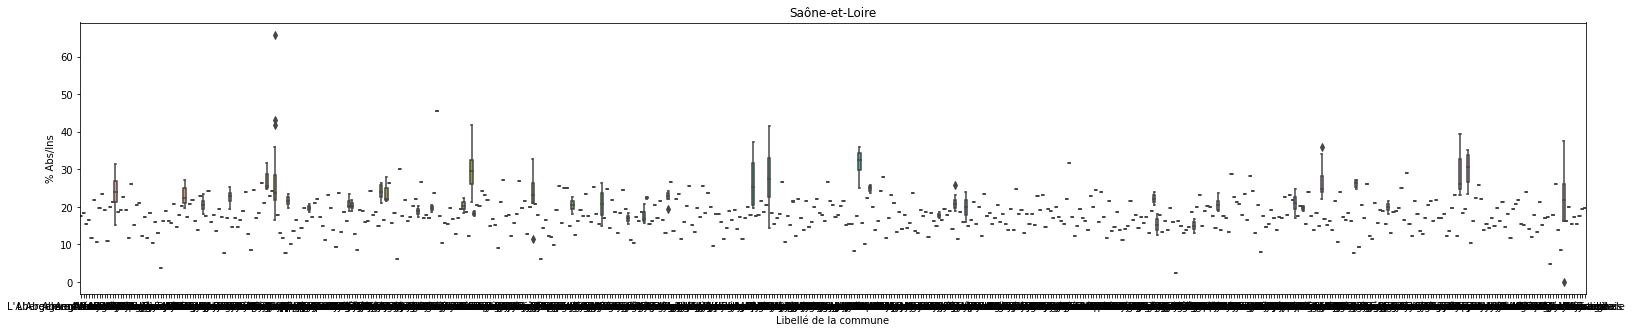

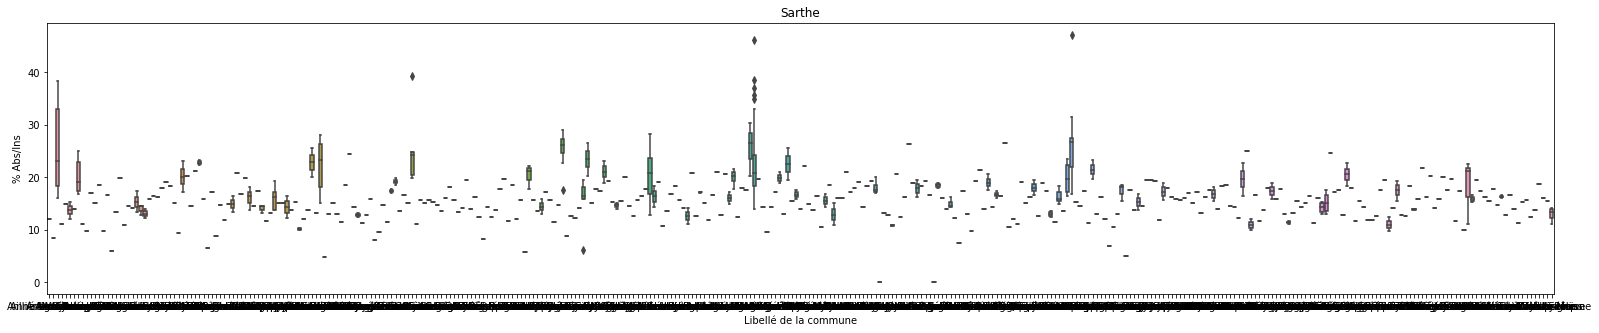

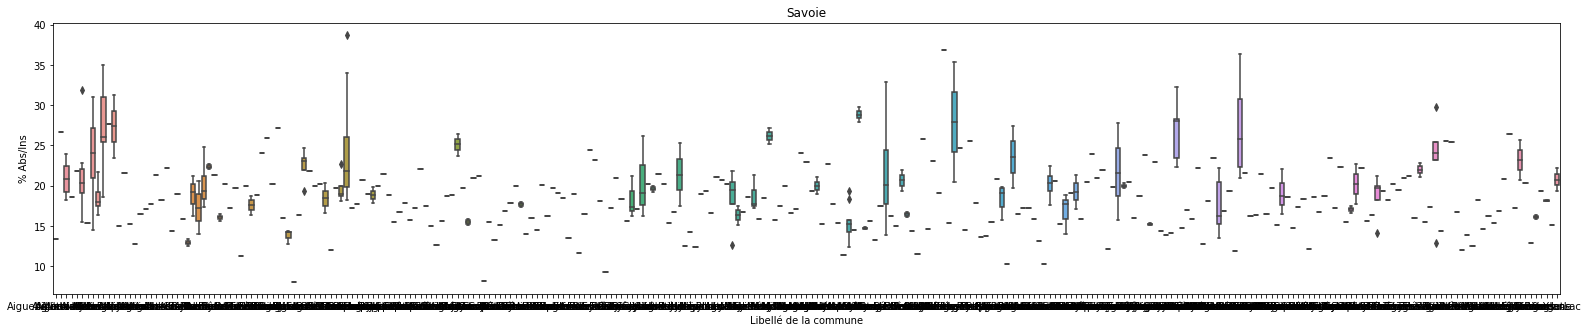

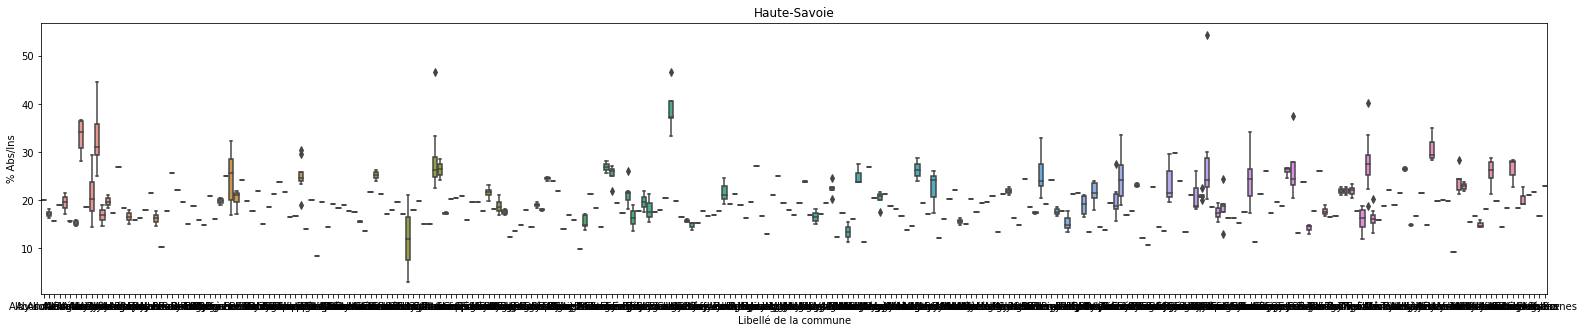

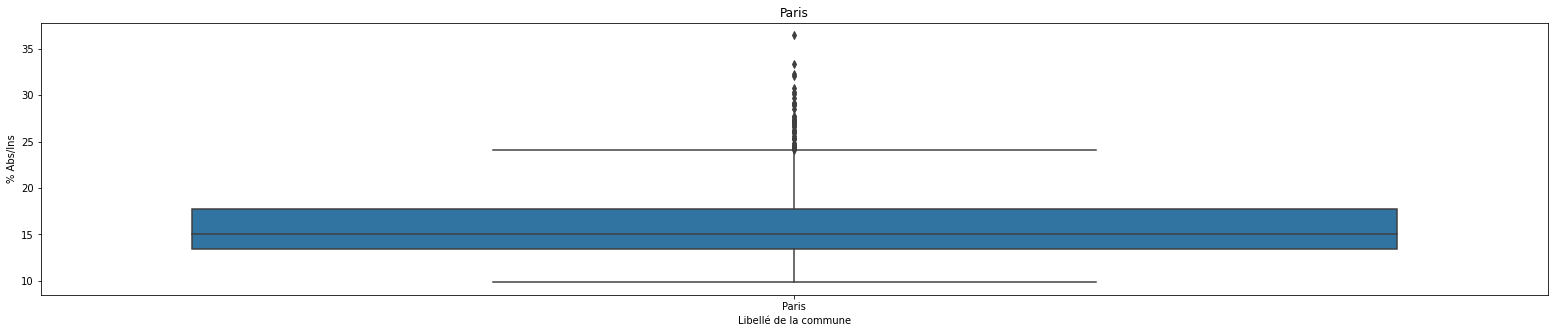

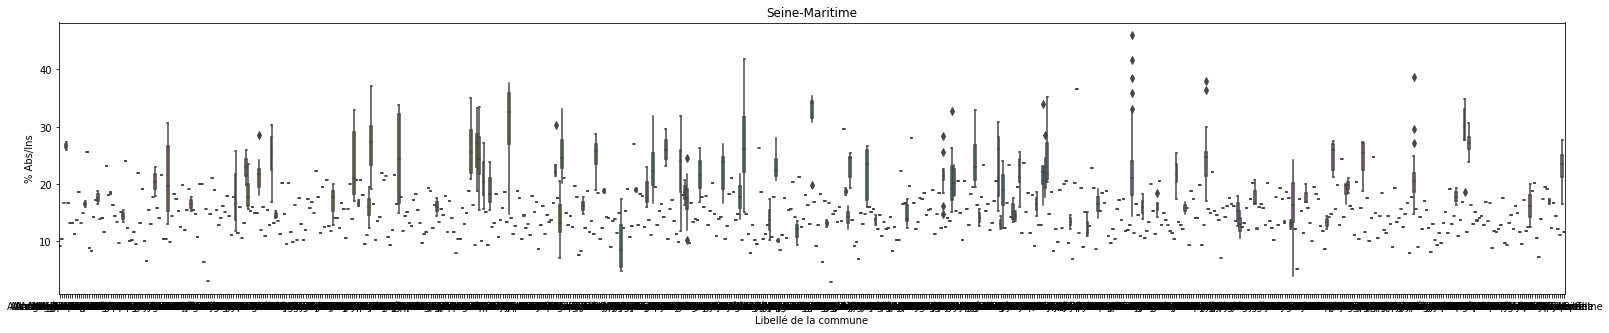

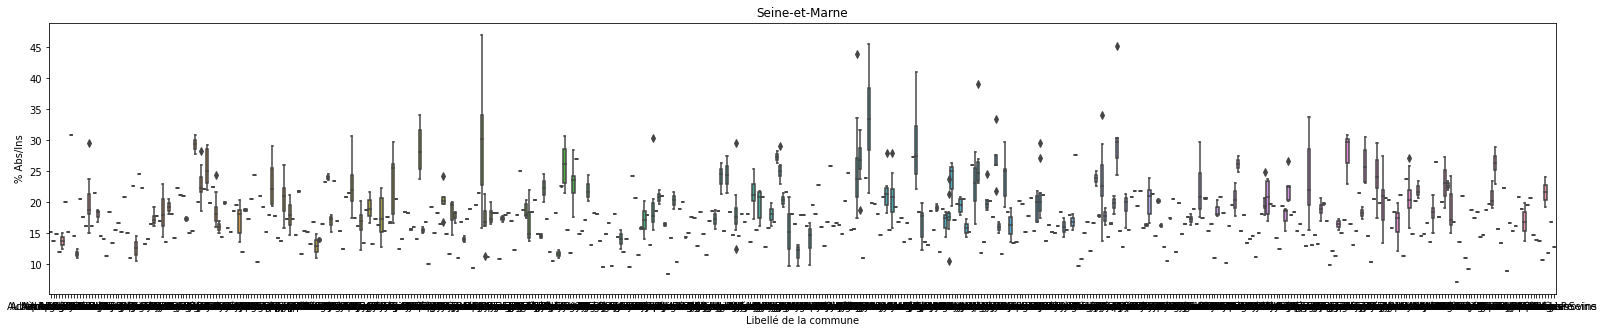

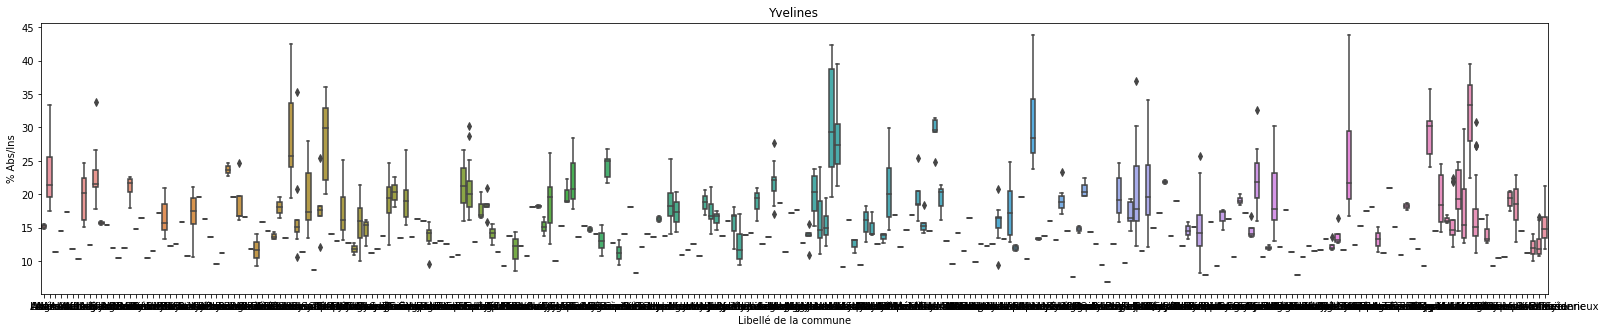

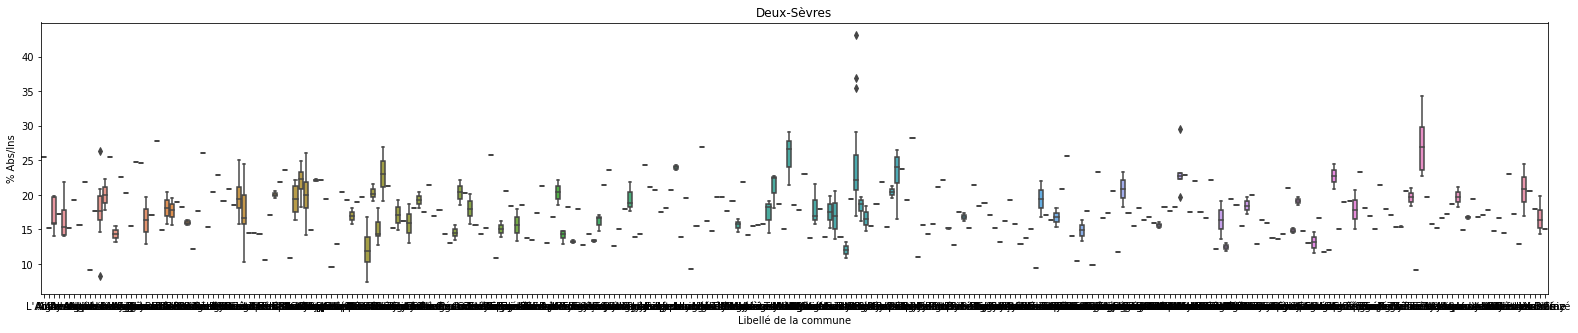

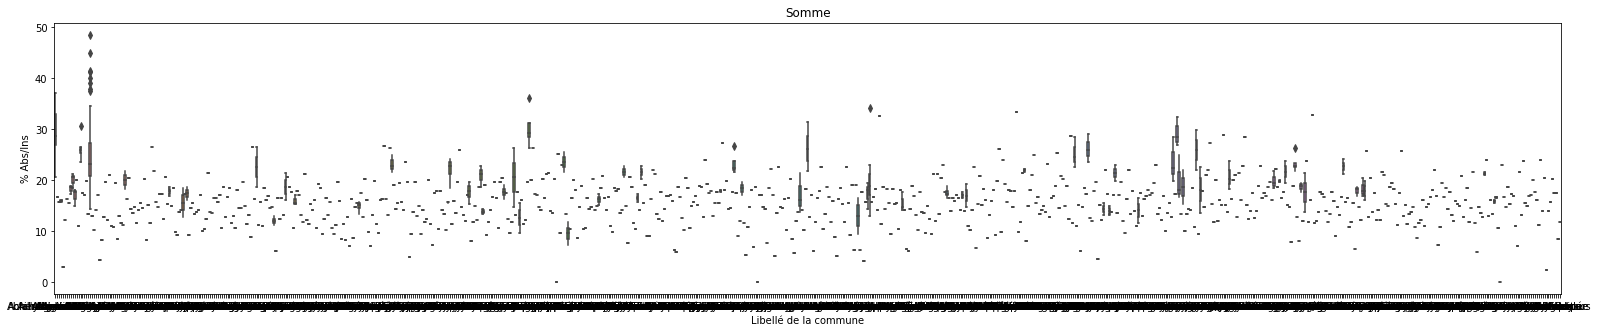

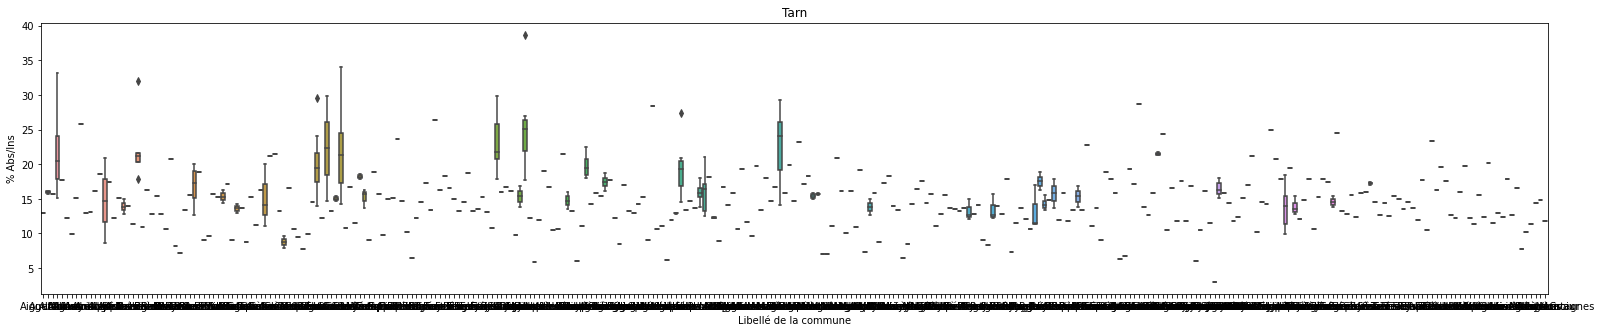

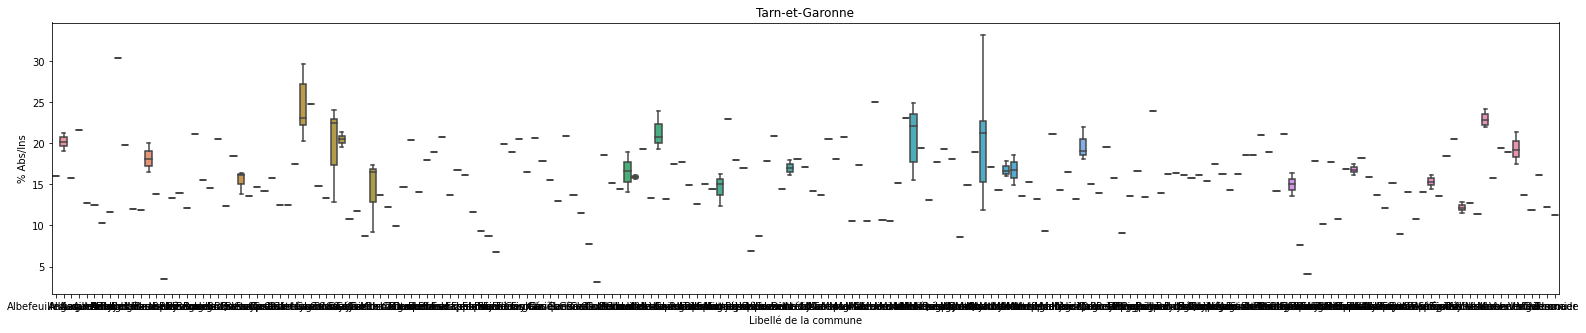

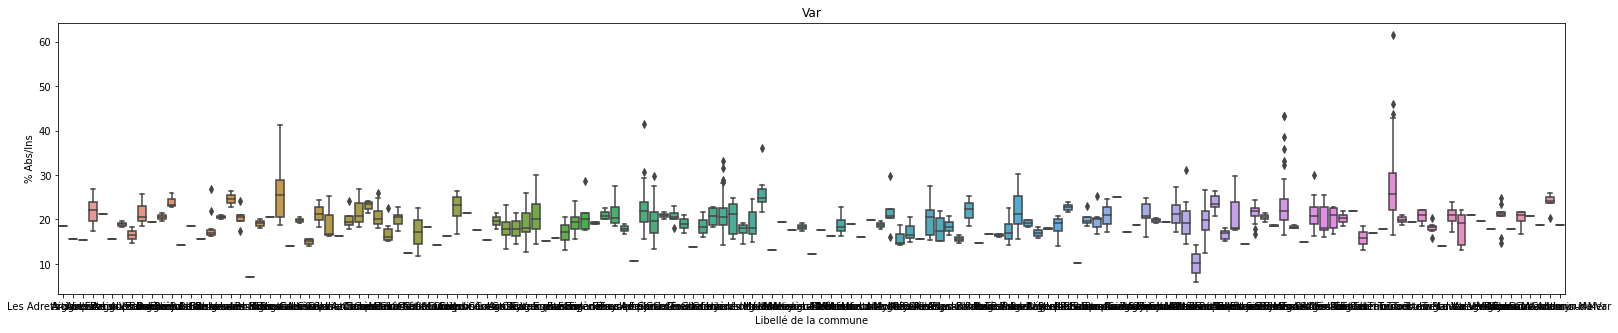

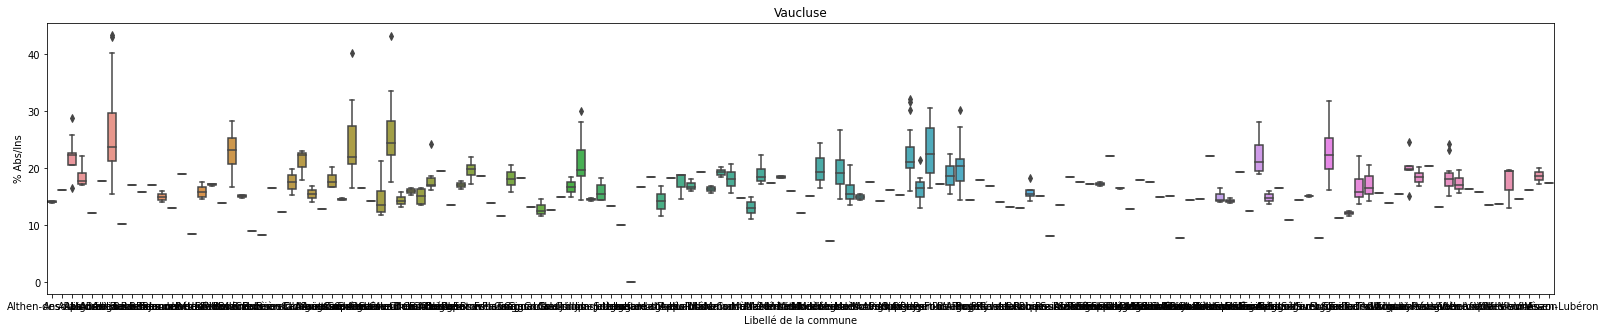

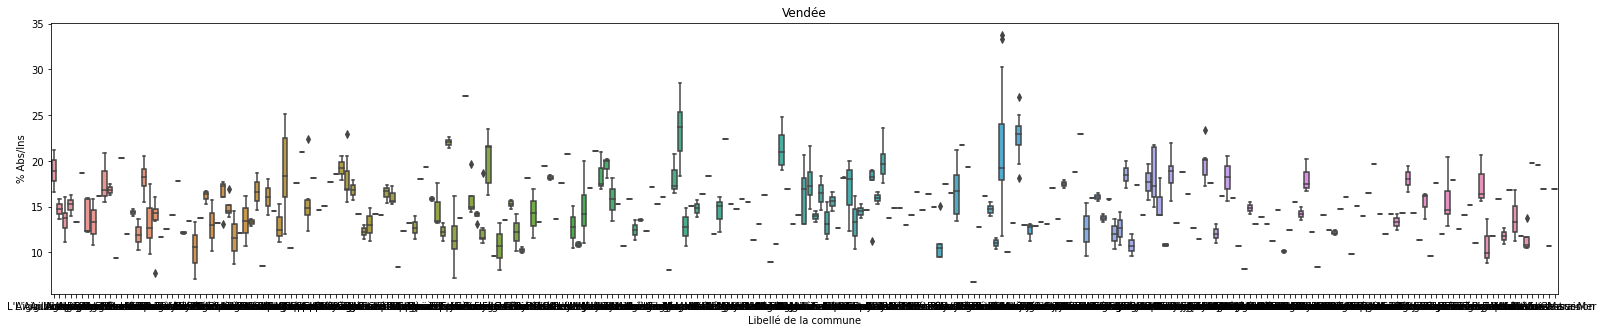

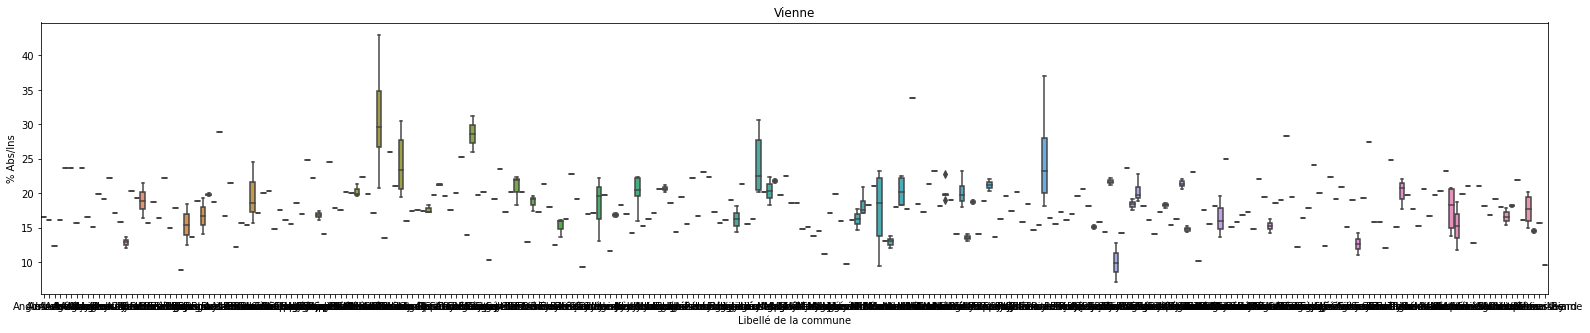

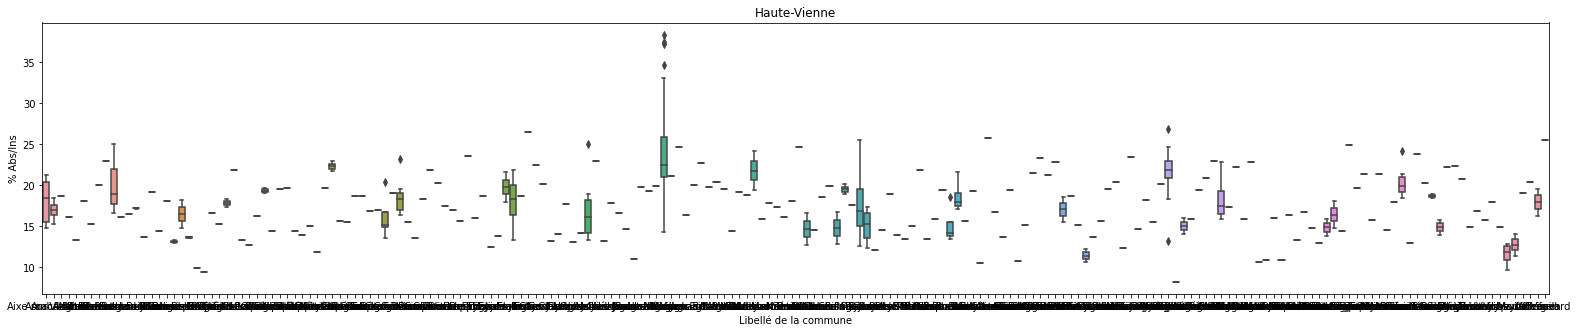

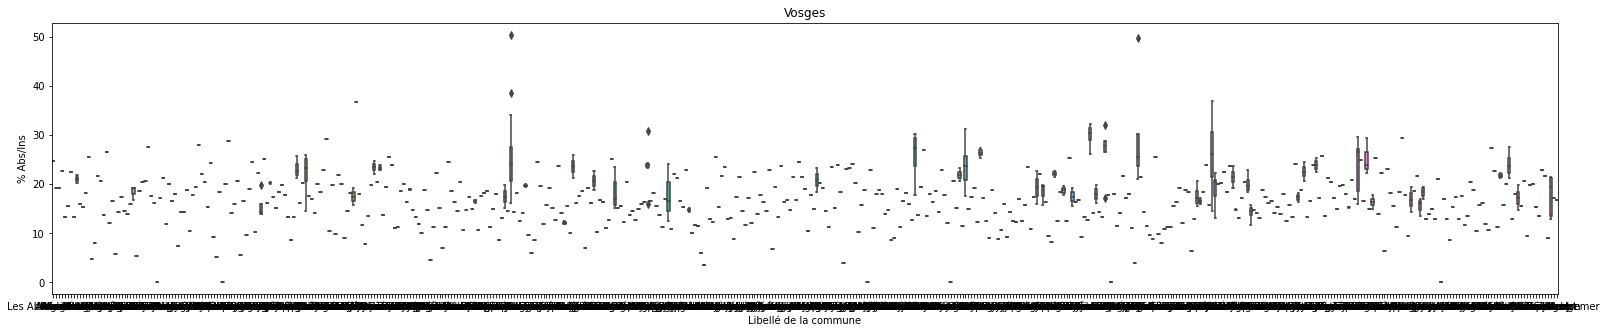

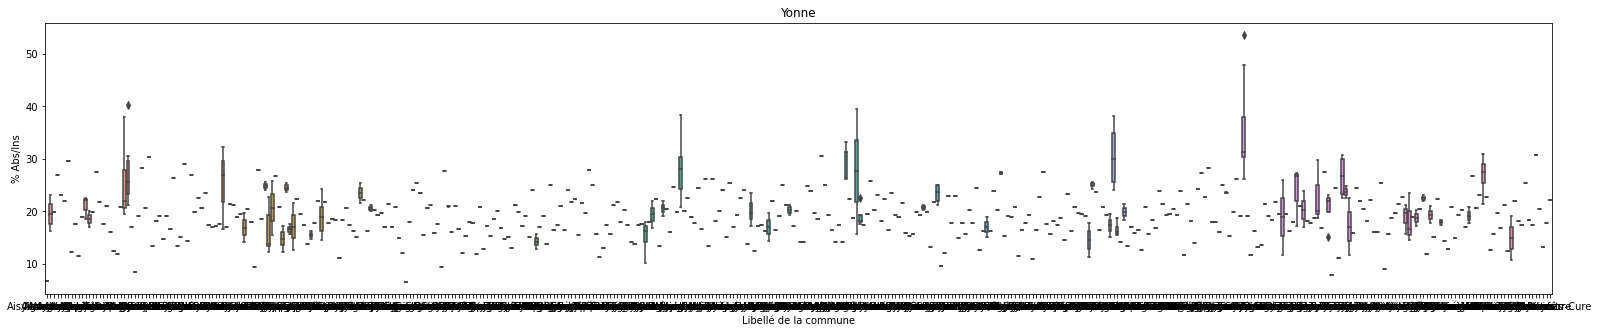

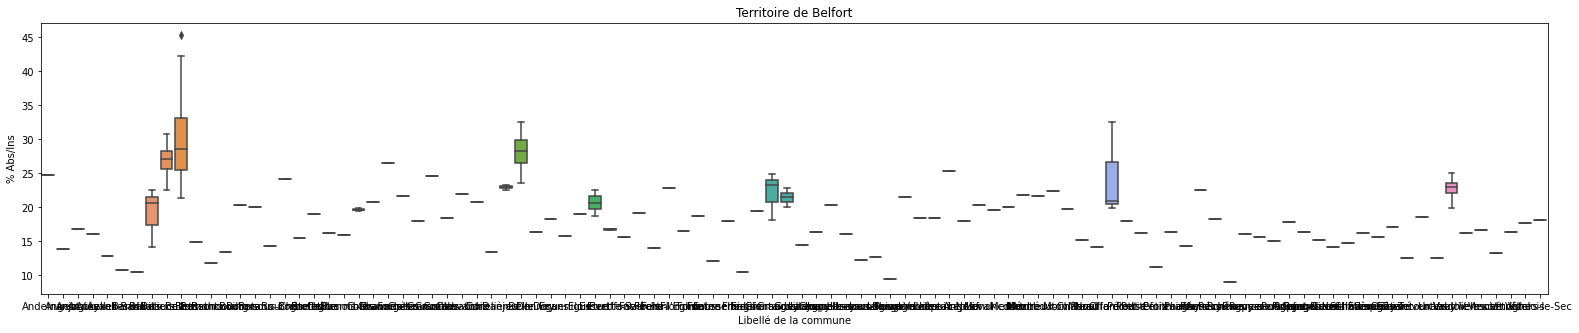

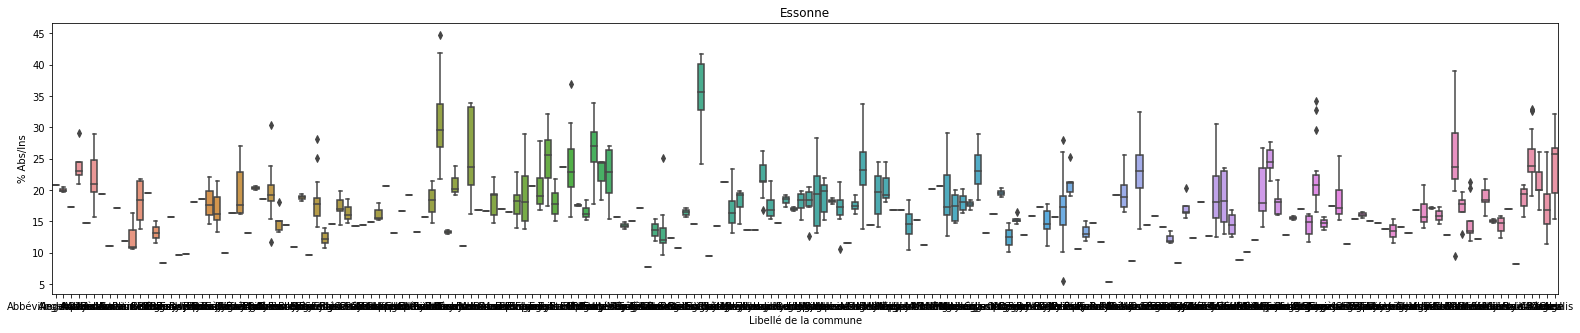

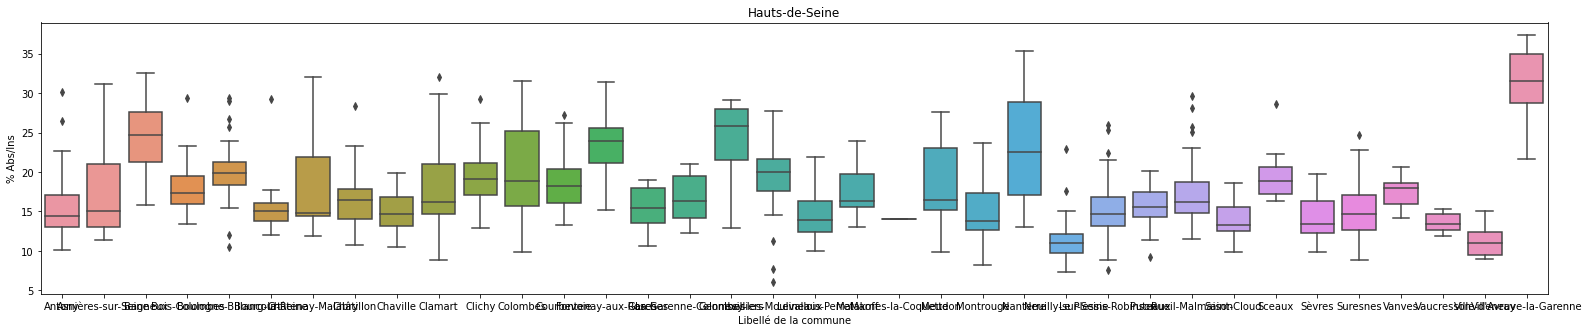

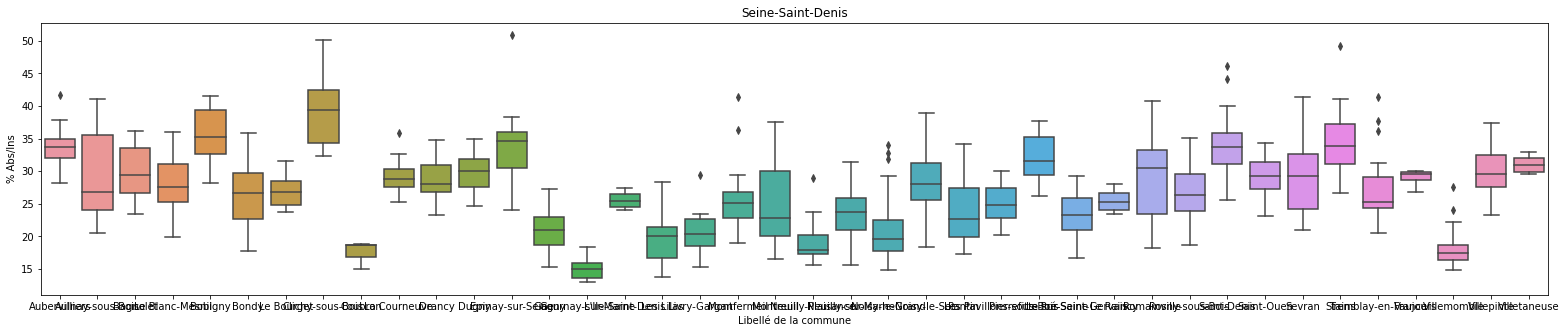

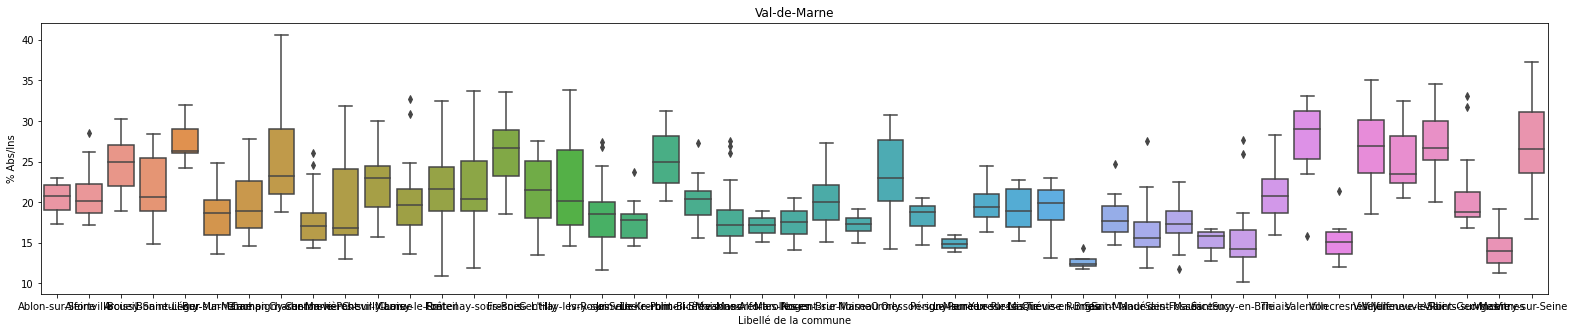

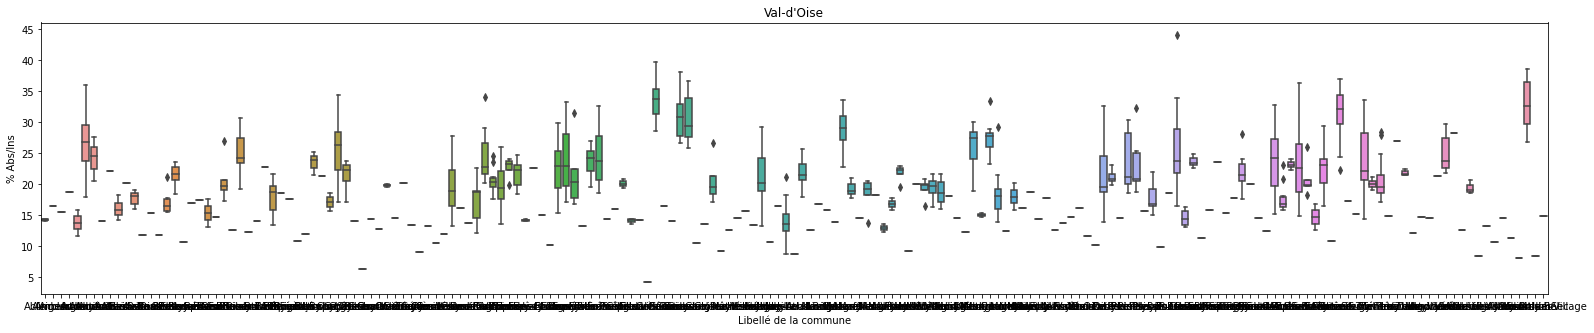

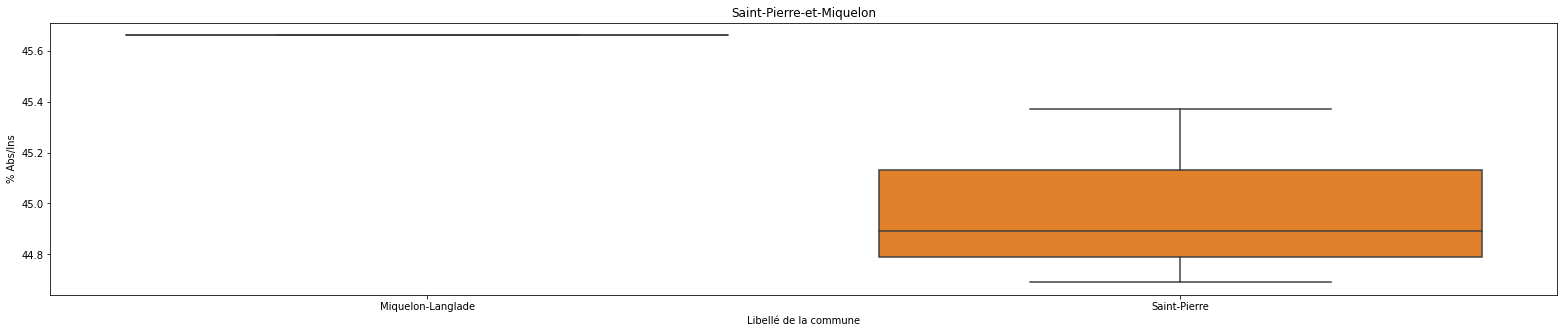

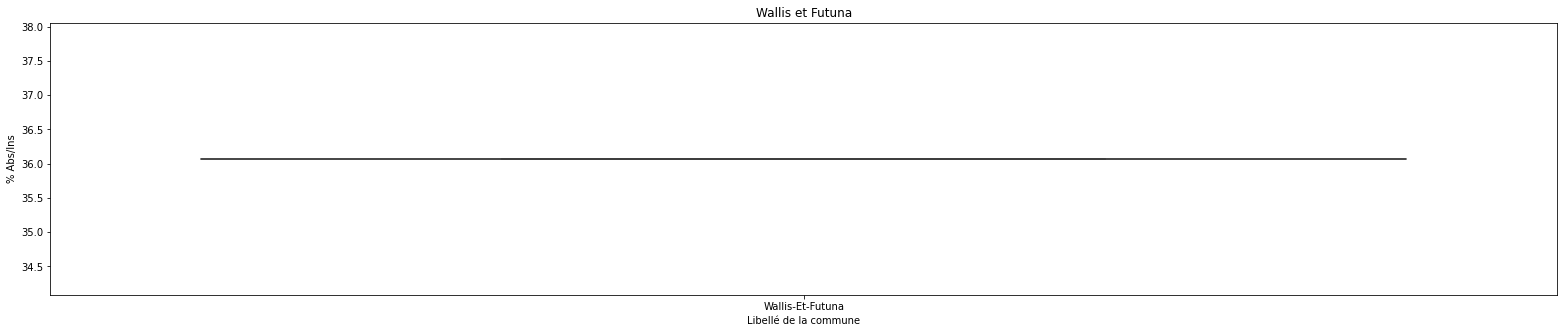

In [22]:
for dep in bureaux_metro['Libellé du département'].unique():
    df = bureaux_metro[bureaux_metro['Libellé du département']==dep]
    plt.figure(figsize=(27, 5))
    sns.boxplot(
    
    x="Libellé de la commune",
    y="% Abs/Ins",
    data=df
    ).set_title(dep)
    plt.show()
    plt.close()
    
    

In [8]:
bureaux_metro.columns

Index(['Code du département', 'Libellé du département',
       'Code de la circonscription', 'Libellé de la circonscription',
       'Code de la commune', 'Libellé de la commune', 'Code du b.vote',
       'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins',
       'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
       '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot', 'N°Panneau', 'Sexe',
       'Nom', 'Prénom', 'Voix', '% Voix/Ins', '% Voix/Exp', 'N°Panneau.1',
       'Sexe.1', 'Nom.1', 'Prénom.1', 'Voix.1', '% Voix/Ins.1', '% Voix/Exp.1',
       'N°Panneau.2', 'Sexe.2', 'Nom.2', 'Prénom.2', 'Voix.2', '% Voix/Ins.2',
       '% Voix/Exp.2', 'N°Panneau.3', 'Sexe.3', 'Nom.3', 'Prénom.3', 'Voix.3',
       '% Voix/Ins.3', '% Voix/Exp.3', 'N°Panneau.4', 'Sexe.4', 'Nom.4',
       'Prénom.4', 'Voix.4', '% Voix/Ins.4', '% Voix/Exp.4', 'N°Panneau.5',
       'Sexe.5', 'Nom.5', 'Prénom.5', 'Voix.5', '% Voix/Ins.5', '% Voix/Exp.5',
       'N°Panneau.6', 'Sexe.6', 'Nom.6